<a href="https://colab.research.google.com/github/BrendaLoznik/housing/blob/main/Housing_github_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WELCOME TO AMES, IOWA!!!

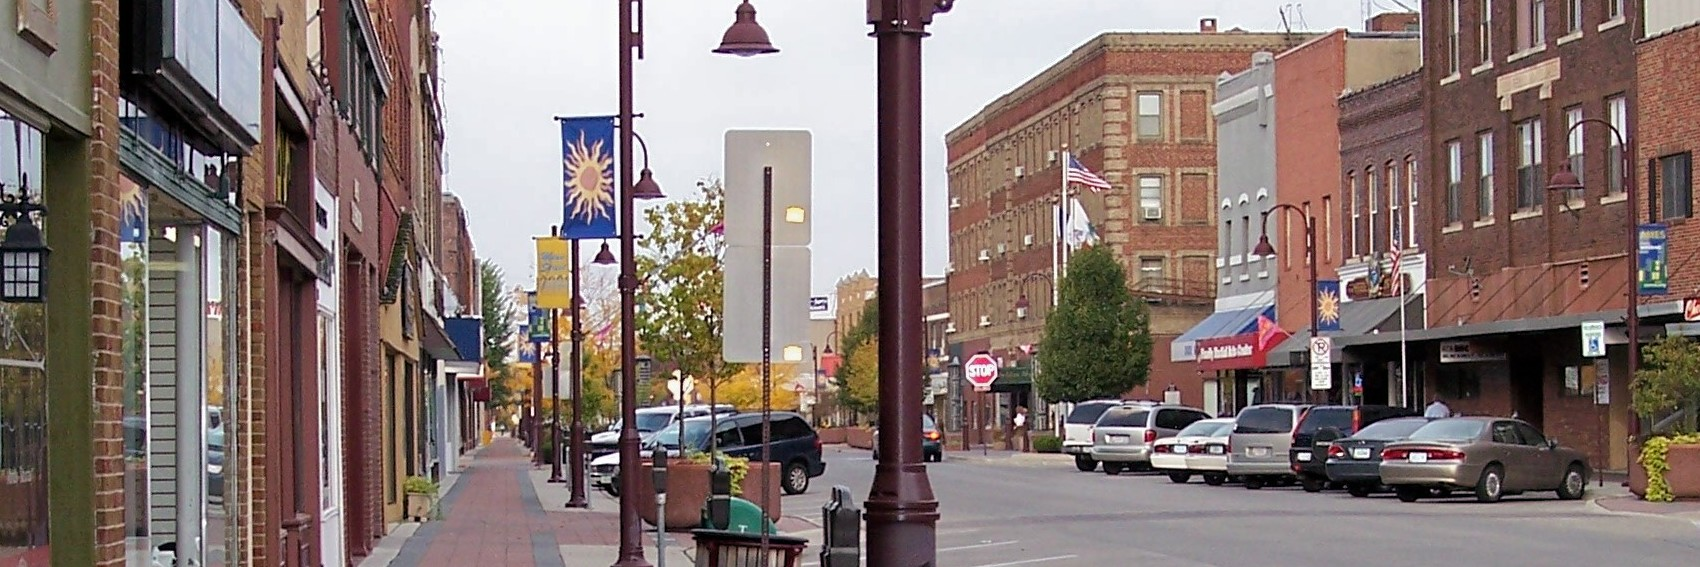

The Housing prices competition is with over 45.000 participating teams and individuals probably the most popular Machine Learning competition on Kaggle. The goal of this competition is to predict the sale price of residential homes in Ames, Iowa using 79 explanatory variables.  This was my very first Machine Learning competition and I will show you how I got a top 9% score on the public leaderboard. 


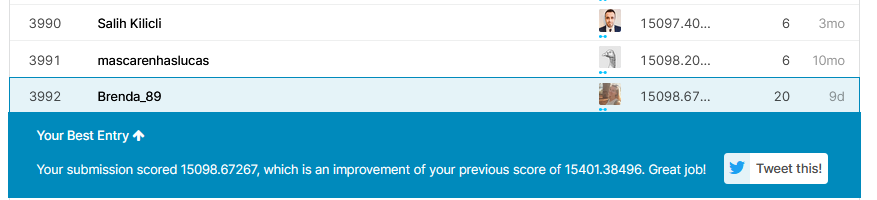

##**1 HOUSEKEEPING**

####**1.1 LOADING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#data cleaning
from sklearn.impute import SimpleImputer
from fancyimpute import KNN 
from fancyimpute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder

#feature engineering
from sklearn.preprocessing import StandardScaler

#modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.model_selection import GridSearchCV

####**1.2 LOADING DATA**

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
train=pd.read_csv('gdrive/My Drive/Kaggle/housing/train.csv')
test=pd.read_csv('gdrive/My Drive/Kaggle/housing/test.csv')

In [ ]:
pd.set_option("display.max_columns", 250)
pd.set_option("display.max_rows", 100)

##**2 CLEANING**

I like to concatenate the training and testing data together for cleaning and exploratory data analysis. We have to be careful in order to prevent data leakage. I want to try different methods for dealing with missing datapoints in this chapter.

In [ ]:
# Concatenate train and test together
raw = pd.concat([train, test])
raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [ ]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

The data has 2.919 entries and 81 different features of different data types. I will be easier to clean and analyse these features if I first divide them in different categories. Befre I do that, I will turn Month Sold into a categorical feature.



*   Nominal:    Categorical features without order
*   Ordinal:    Categorical features with order

*   Discrete:   Numerical features that take discrete values
*   Continious: Numerical features consisting of continious values



In [ ]:
# I will change the datatype of ["MonthSold"] to a string.
raw["MoSold"] = raw["MoSold"].astype("str")

In [ ]:
nominal =[ 'MSZoning', 'Street', 'Alley',  'LotConfig',  'Neighborhood', 'Condition1', 'Condition2',
          'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
          'Foundation',  'Heating','CentralAir', 'Electrical','GarageType', 'PavedDrive', 'MiscFeature',
          'SaleType', 'SaleCondition', 'MoSold']

ordinal =['ExterQual', 'ExterCond' , 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC' ,  
          'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageCond', 'GarageQual', 'PoolQC', 'Fence', 'LotShape',
          'LandContour' , 'LandSlope', 'Utilities', 'Functional' , 'BsmtFinType1' , 'BsmtFinType2'  ]

discrete =['Id', 'MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'BedroomAbvGr', 'YearRemodAdd', 
           'BsmtFullBath',  'BsmtHalfBath', 'FullBath','HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
           'GarageYrBlt', 'GarageCars','YrSold']

continious = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
              '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea','GarageArea', 'WoodDeckSF', 'OpenPorchSF',
              'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'  ]


In [ ]:
print("Number of nominal features: {}".format(len(nominal)))
print("Number of ordinal features: {}".format(len(ordinal)))
print("Number of discrete features: {}".format(len(discrete)))
print("Number of continious features: {}".format(len(continious)))
print("Total number offeatures: {}".format(len(continious + discrete + ordinal + nominal)))

Number of nominal features: 24
Number of ordinal features: 20
Number of discrete features: 17
Number of continious features: 20
Total number offeatures: 81


I generally like to make a copy of the dataset for each phase of the project. This makes it easier to make changes.

In [ ]:
clean = raw.copy()


### **2.1 CONTINIOUS FEATURES**

In [ ]:
raw[continious].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,548.0,0,61,0,0,0,0,0,208500.0
1,80.0,9600,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,460.0,298,0,0,0,0,0,0,181500.0
2,68.0,11250,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,608.0,0,42,0,0,0,0,0,223500.0
3,60.0,9550,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,642.0,0,35,272,0,0,0,0,140000.0
4,84.0,14260,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,836.0,192,84,0,0,0,0,0,250000.0


In [ ]:
# number of missing continious data points
print(raw[continious].isna().sum().sort_values(ascending=False))

SalePrice        1459
LotFrontage       486
MasVnrArea         23
BsmtFinSF1          1
BsmtFinSF2          1
GarageArea          1
BsmtUnfSF           1
TotalBsmtSF         1
PoolArea            0
1stFlrSF            0
LotArea             0
2ndFlrSF            0
ScreenPorch         0
MiscVal             0
GrLivArea           0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
LowQualFinSF        0
dtype: int64


LOT FRONTAGE

This feature has a lot of missing data. We will use simple imputer and fancy imputer to fill these missing datapoints.

GARAGE AREA

In [ ]:
#Let's see what we can figure out about the missing values: This house doesn't appear to have a garage
mis_GarageArea= raw[raw["GarageArea"].isna()]
mis_GarageArea.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1116,2577,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,NaN


In [ ]:
#Impute missing values by zero
clean['GarageArea'].fillna(value=0, inplace = True)

BASEMENT SF

In [ ]:
#Let's see what we can figure out about the missing values: This house has no basement
mis_TotalBsmtSF= raw[raw["TotalBsmtSF"].isna()]
mis_TotalBsmtSF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
660,2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,NaN


In [ ]:
#impute missing values by zero
clean['TotalBsmtSF'].fillna(value=0, inplace = True)
clean['BsmtFinSF1'].fillna(value=0, inplace = True)
clean['BsmtFinSF2'].fillna(value=0, inplace = True)
clean['BsmtUnfSF'].fillna(value=0, inplace = True)

MASONRY VENEER AREA

This feature has a lot of missing data. We will use simple imputer and fancy imputer to fill these missing datapoints.

### 2.2 DISCRETE FEATURES

In [ ]:
raw[discrete].head()

,Id,MSSubClass,OverallQual,OverallCond,YearBuilt,BedroomAbvGr,YearRemodAdd,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,YrSold
0,1,60,7,5,2003,3,2003,1.0,0.0,2,1,1,8,0,2003.0,2.0,2008
1,2,20,6,8,1976,3,1976,0.0,1.0,2,0,1,6,1,1976.0,2.0,2007
2,3,60,7,5,2001,3,2002,1.0,0.0,2,1,1,6,1,2001.0,2.0,2008
3,4,70,7,5,1915,3,1970,1.0,0.0,1,0,1,7,1,1998.0,3.0,2006
4,5,60,8,5,2000,4,2000,1.0,0.0,2,1,1,9,1,2000.0,3.0,2008


In [ ]:
# discrete data with missing data points
print(raw[discrete].isna().sum())

Id                0
MSSubClass        0
OverallQual       0
OverallCond       0
YearBuilt         0
BedroomAbvGr      0
YearRemodAdd      0
BsmtFullBath      2
BsmtHalfBath      2
FullBath          0
HalfBath          0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt     159
GarageCars        1
YrSold            0
dtype: int64


BASEMENT BATHROOMS

In [ ]:
#Let's see what we can figure out about the missing values: The houses have no basement
mis_BsmtFullBath= raw[raw["BsmtFullBath"].isna()]
mis_BsmtFullBath.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
660,2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,NaN
728,2189,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,NaN


In [ ]:
#impute missing values by zero
clean['BsmtFullBath'].fillna(value=0, inplace = True)
clean['BsmtHalfBath'].fillna(value=0, inplace = True)

GARAGE YEAR BUILT

In [ ]:
#Let's see what we can figure out about the missing values
mis_GarageYrBlt= raw[raw["GarageYrBlt"].isna()]
mis_GarageYrBlt.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseP,1152,0,0,1152,0.0,0.0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000.0
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,736.0,736.0,GasA,Gd,Y,SBrkr,736,716,0,1452,0.0,0.0,2,0,2,3,TA,8,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,102,0,0,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000.0
78,79,90,RL,72.0,10778,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1768.0,1768.0,GasA,TA,N,SBrkr,1768,0,0,1768,0.0,0.0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,136500.0
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,1013.0,1013.0,GasA,TA,N,SBrkr,1013,0,513,1526,0.0,0.0,1,0,2,1,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,156,0,0,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000.0
89,90,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588.0,Unf,0.0,402.0,990.0,GasA,Ex,Y,SBrkr,990,0,0,990,1.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,123600.0


Missing values seem to match with houses that don't have a garage. Imputation could give some strange results. I also don't think that the year a garage was built will affect the price of a house. I will therefore drop this feature.

In [ ]:
#drop Garage Year Built
clean = clean.drop(["GarageYrBlt"], axis=1)

GARAGE CARS

In [ ]:
#Let's see what we can figure out about the missing values: House probably doesn't have a garage
mis_GarageCars= raw[raw["GarageCars"].isna()]
mis_GarageCars.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1116,2577,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,NaN


In [ ]:
#impute missing values by zero
clean['GarageCars'].fillna(value=0, inplace = True)

### **2.3 NOMINAL FEATURES**

In [ ]:
raw[nominal].head()

,MSZoning,Street,Alley,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,PavedDrive,MiscFeature,SaleType,SaleCondition,MoSold
0,RL,Pave,NaN,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,Y,NaN,WD,Normal,2
1,RL,Pave,NaN,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Y,SBrkr,Attchd,Y,NaN,WD,Normal,5
2,RL,Pave,NaN,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,Y,NaN,WD,Normal,9
3,RL,Pave,NaN,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,Y,SBrkr,Detchd,Y,NaN,WD,Abnorml,2
4,RL,Pave,NaN,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,Y,NaN,WD,Normal,12


In [ ]:
# nominal data with missing data points
print(raw[nominal].isna().sum())

MSZoning            4
Street              0
Alley            2721
LotConfig           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
Foundation          0
Heating             0
CentralAir          0
Electrical          1
GarageType        157
PavedDrive          0
MiscFeature      2814
SaleType            1
SaleCondition       0
MoSold              0
dtype: int64


ALLEY & MISCELLANEOUS FEATURES

These two features have a lot of missing data. From the data descrption we known that NA in the Alley feature means that the house has no alley access. NA Miscellaneous features indicates that the house has no miscellaneous features. I could create a category to indicate this, but it would be a low variance feature that probably adds little information. I will therefore drop these two features.

In [ ]:
#drop Alley and Miscellaneous Features
clean = clean.drop(["Alley"], axis=1)
clean = clean.drop(["MiscFeature"], axis=1)

GARAGE TYPE

In [ ]:
#create a sepperate category for houses without garages
clean['GarageType'].fillna(value="None", inplace = True)


MS ZONING

We will use Simple Imputer to impute missing values.

EXTERIOR 1ST & 2ND FLOOR

We will use Simple Imputer to impute missing values.

MASONRY VENEER TYPE

We will use Simple Imputer to impute missing values.

ELECTRICAL

We will use Simple Imputer to impute missing values.

### 2.4 ORDINAL FEATURES

In [ ]:
raw[ordinal].head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,KitchenQual,FireplaceQu,GarageFinish,GarageCond,GarageQual,PoolQC,Fence,LotShape,LandContour,LandSlope,Utilities,Functional,BsmtFinType1,BsmtFinType2
0,Gd,TA,Gd,TA,No,Ex,Gd,NaN,RFn,TA,TA,NaN,NaN,Reg,Lvl,Gtl,AllPub,Typ,GLQ,Unf
1,TA,TA,Gd,TA,Gd,Ex,TA,TA,RFn,TA,TA,NaN,NaN,Reg,Lvl,Gtl,AllPub,Typ,ALQ,Unf
2,Gd,TA,Gd,TA,Mn,Ex,Gd,TA,RFn,TA,TA,NaN,NaN,IR1,Lvl,Gtl,AllPub,Typ,GLQ,Unf
3,TA,TA,TA,Gd,No,Gd,Gd,Gd,Unf,TA,TA,NaN,NaN,IR1,Lvl,Gtl,AllPub,Typ,ALQ,Unf
4,Gd,TA,Gd,TA,Av,Ex,Gd,TA,RFn,TA,TA,NaN,NaN,IR1,Lvl,Gtl,AllPub,Typ,GLQ,Unf


In [ ]:
# missing ordinal data points
print(raw[ordinal].isna().sum())

ExterQual          0
ExterCond          0
BsmtQual          81
BsmtCond          82
BsmtExposure      82
HeatingQC          0
KitchenQual        1
FireplaceQu     1420
GarageFinish     159
GarageCond       159
GarageQual       159
PoolQC          2909
Fence           2348
LotShape           0
LandContour        0
LandSlope          0
Utilities          2
Functional         2
BsmtFinType1      79
BsmtFinType2      80
dtype: int64


KITCHEN QUALITY

In [ ]:
#Let's see what we can figure out about the missing values
mis_KitchQual= raw[raw["KitchenQual"].isna()]
mis_KitchQual.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
95,1556,50,RL,72.0,10632,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,3,1917,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,Fa,No,Unf,0.0,Unf,0.0,689.0,689.0,GasA,Gd,N,SBrkr,725,499,0,1224,0.0,0.0,1,1,3,1,NaN,6,Mod,0,NaN,Detchd,1917.0,Unf,1.0,180.0,Fa,Fa,N,0,0,248,0,0,0,NaN,NaN,NaN,0,1,2010,COD,Normal,NaN


We will use Simple Imputer to impute missing values.

FUNCTIONAL

In [ ]:
#Let's see what we can figure out about the missing values
mis_Functional= raw[raw["Functional"].isna()]
mis_Functional.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
756,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml,NaN
1013,2474,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,4,1,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,771.0,771.0,GasA,Fa,Y,SBrkr,866,504,114,1484,0.0,0.0,2,0,3,1,TA,6,NaN,0,NaN,Detchd,1910.0,Unf,1.0,264.0,TA,Fa,N,14,211,0,0,84,0,NaN,NaN,NaN,0,9,2007,COD,Abnorml,NaN


We will use Simple Imputer to impute missing values.

FIRE PLACE QUALITY, POOL QUALITY & FENCE

In [ ]:
clean = clean.drop(["FireplaceQu"], axis=1)
clean = clean.drop(["PoolQC"], axis=1)
clean = clean.drop(["Fence"], axis=1)

These three features have a lot of missing data and will be dropped.

BASEMENT QUALITY & FINISH

These houses actually don't have a basement. It makes no sense to impute missing data by the mode. I will therefory create a sepperate category to indicate that the house has no basement.

In [ ]:
#Create category None to indicate that the house has no basement
clean['BsmtFinType1'].fillna(value="None", inplace = True)
clean['BsmtFinType2'].fillna(value="None", inplace = True)
clean['BsmtQual'].fillna(value="None", inplace = True)
clean['BsmtCond'].fillna(value="None", inplace = True)
clean['BsmtExposure'].fillna(value="None", inplace = True)

GARAGE QUALITY & FINISH

These houses actually don't have a garage. It makes no sense to impute missing data by the mode. I will therefory create a sepperate category to indicate that the house has no garage.

In [ ]:
#create category None to indicate that the house has no garage
clean['GarageFinish'].fillna(value="None", inplace = True)
clean['GarageQual'].fillna(value="None", inplace = True)
clean['GarageCond'].fillna(value="None", inplace = True)

### **2.5 SIMPLE IMPUTER**

Clean is now a dataframe in which I dropped 6 features. The dataframe still contains missing data. I will use three different techniques to impute these missing datapoints.

In [ ]:
#make a copy of the dataframe for simple imputer
simple = clean.copy()

In [ ]:
# I want to avoid leakage while imputing missing values, so I split the dataframe
simple_train = simple[simple["Id"].isin(train["Id"])]
simple_test =  simple[simple["Id"].isin(test["Id"])]

In [ ]:
# Create mean imputer object
mean_imputer = SimpleImputer(strategy="mean")
mode_imputer = SimpleImputer(strategy="most_frequent")

#fit imputers to the train data
mean_imputer = mean_imputer.fit(simple_train[["LotFrontage"]])
mean_imputer = mean_imputer.fit(simple_train[["MasVnrArea"]])
mode_imputer = mode_imputer.fit(simple_train[["MasVnrType"]])
mode_imputer = mode_imputer.fit(simple_train[["MSZoning"]])
mode_imputer = mode_imputer.fit(simple_train[["Electrical"]])
mode_imputer = mode_imputer.fit(simple_train[["Functional"]])
mode_imputer = mode_imputer.fit(simple_train[["KitchenQual"]])

mode_imputer = mode_imputer.fit(simple_train[["Exterior1st"]])
mode_imputer = mode_imputer.fit(simple_train[["Exterior2nd"]])
mode_imputer = mode_imputer.fit(simple_train[["Utilities"]])
mode_imputer = mode_imputer.fit(simple_train[["SaleType"]])

#transform both train and test
simple_train['LotFrontage'] = mean_imputer.transform(simple_train[['LotFrontage']])
simple_test['LotFrontage'] = mean_imputer.transform(simple_test[['LotFrontage']])

simple_train['MasVnrArea'] = mean_imputer.transform(simple_train[['MasVnrArea']])
simple_test['MasVnrArea'] = mean_imputer.transform(simple_test[['MasVnrArea']])

simple_train['MasVnrType'] = mode_imputer.transform(simple_train[['MasVnrType']])
simple_test['MasVnrType'] = mode_imputer.transform(simple_test[['MasVnrType']])

simple_train['MSZoning'] = mode_imputer.transform(simple_train[['MSZoning']])
simple_test['MSZoning'] = mode_imputer.transform(simple_test[['MSZoning']])

simple_train['Electrical'] = mode_imputer.transform(simple_train[['Electrical']])
simple_test['Electrical'] = mode_imputer.transform(simple_test[['Electrical']])

simple_train['Functional'] = mode_imputer.transform(simple_train[['Functional']])
simple_test['Functional'] = mode_imputer.transform(simple_test[['Functional']])

simple_train['KitchenQual'] = mode_imputer.transform(simple_train[['KitchenQual']])
simple_test['KitchenQual'] = mode_imputer.transform(simple_test[['KitchenQual']])

simple_train['Exterior1st'] = mode_imputer.transform(simple_train[['Exterior1st']])
simple_test['Exterior1st'] = mode_imputer.transform(simple_test[['Exterior1st']])

simple_train['Exterior2nd'] = mode_imputer.transform(simple_train[['Exterior2nd']])
simple_test['Exterior2nd'] = mode_imputer.transform(simple_test[['Exterior2nd']])

simple_train['Utilities'] = mode_imputer.transform(simple_train[['Utilities']])
simple_test['Utilities'] = mode_imputer.transform(simple_test[['Utilities']])

simple_train['SaleType'] = mode_imputer.transform(simple_train[['SaleType']])
simple_test['SaleType'] = mode_imputer.transform(simple_test[['SaleType']])


In [ ]:
#concatenate simple_train and simple_test together for encoding: dataframe without NA
simple = pd.concat([simple_train, simple_test])


In [ ]:
#select categorical columns
categorical_cols = [cname for cname in simple.columns if
                    simple[cname].dtype == "object"]


#onehot enocide the categorical features
ohe = pd.get_dummies(simple[categorical_cols], prefix="OHE")
 
# Concatenate this set back to dataframe
simple_ohe = pd.concat([simple, ohe], axis=1)

#drop redundant features
to_drop = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'SaleType', 'SaleCondition']
simple_ohe= simple_ohe.drop(to_drop, axis=1)



In [ ]:
# split the dataset to train and test
simple_train_enc = simple_ohe[simple_ohe["Id"].isin(train["Id"])]
simple_test_enc =  simple_ohe[simple_ohe["Id"].isin(test["Id"])]

### **2.5 KNN IMPUTER**

In [ ]:
# Make a copy of the dataset for knn imputation
knn_imputed = clean.copy()

In [ ]:
categorical_cols = [cname for cname in knn_imputed.columns if
                    knn_imputed[cname].dtype == "object"]

print(categorical_cols)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'SaleType', 'SaleCondition']


In [ ]:
# Create a one-hot encoded set 
ohe = pd.get_dummies(knn_imputed[categorical_cols], prefix="OHE")
 
# Concatenate this set back to the DataFrame
knn_imputed_ohe = pd.concat([knn_imputed, ohe], axis=1)

In [ ]:
#drop features
to_drop = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'SaleType', 'SaleCondition']
knn_imputed_ohe= knn_imputed_ohe.drop(to_drop, axis=1)

In [ ]:
#Use KNN for imputing missing values
KNN_imputer = KNN()
knn_imputed_ohe.iloc[:, :] = np.round(KNN_imputer.fit_transform(knn_imputed_ohe))


Imputing row 1/2919 with 0 missing, elapsed time: 11.662
Imputing row 101/2919 with 1 missing, elapsed time: 11.664
Imputing row 201/2919 with 0 missing, elapsed time: 11.666
Imputing row 301/2919 with 0 missing, elapsed time: 11.667
Imputing row 401/2919 with 0 missing, elapsed time: 11.668
Imputing row 501/2919 with 0 missing, elapsed time: 11.669
Imputing row 601/2919 with 0 missing, elapsed time: 11.671
Imputing row 701/2919 with 0 missing, elapsed time: 11.672
Imputing row 801/2919 with 0 missing, elapsed time: 11.673
Imputing row 901/2919 with 1 missing, elapsed time: 11.674
Imputing row 1001/2919 with 0 missing, elapsed time: 11.676
Imputing row 1101/2919 with 0 missing, elapsed time: 11.677
Imputing row 1201/2919 with 0 missing, elapsed time: 11.678
Imputing row 1301/2919 with 1 missing, elapsed time: 11.680
Imputing row 1401/2919 with 0 missing, elapsed time: 11.682
Imputing row 1501/2919 with 2 missing, elapsed time: 11.685
Imputing row 1601/2919 with 1 missing, elapsed time:

In [ ]:
#split the dataset back to train and test
knn_train = knn_imputed_ohe[knn_imputed_ohe["Id"].isin(train["Id"])]
knn_test =  knn_imputed_ohe[knn_imputed_ohe["Id"].isin(test["Id"])]

### **2.6 MICE IMPUTER**

In [ ]:
# Make a copy of the dataset for mice imutation
mice_imputed = clean.copy()

In [ ]:
categorical_cols = [cname for cname in mice_imputed.columns if
                    mice_imputed[cname].dtype == "object"]

print(categorical_cols)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'SaleType', 'SaleCondition']


In [ ]:
# Create a one-hot encoded set 
ohe = pd.get_dummies(mice_imputed[categorical_cols], prefix="OHE")
 
# Concatenate this set back to the ufo DataFrame
mice_imputed_ohe = pd.concat([mice_imputed, ohe], axis=1)

In [ ]:
#drop redundant features
to_drop = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'SaleType', 'SaleCondition']
mice_imputed_ohe= mice_imputed_ohe.drop(to_drop, axis=1)

In [ ]:
#split dataframe in train and test
mice_train = mice_imputed_ohe[mice_imputed_ohe["Id"].isin(train["Id"])]
mice_test =  mice_imputed_ohe[mice_imputed_ohe["Id"].isin(test["Id"])]


In [ ]:
#apply mice imputer to missing values
mice_imputer = IterativeImputer()
mice_train.iloc[:, :] = np.round(mice_imputer.fit_transform(mice_train))
mice_test.iloc[:, :] = np.round(mice_imputer.transform(mice_test))

### **2.7 TESTING QUALITY OF IMPUTATION**

I know have 3 differently imputed dataframes


1.   simple_train_enc: missing values encoded by Simple imputer (mean and mode)
2.   knn_train: missing values encoded by KNN
3.   mice_train: missing values encode by mice

I will now run a simple regression on all three datasets to see which one gives the best performance. This is the dataset I will keep for further analysis.



Note: With KNN imputation is is not possible to simply transform new data. In this dataframe only a few values where missing, so imputation won't have a huge effect, but this is still a form of data leakage that we should be careful with.

In [ ]:
# SIMPLE IMPUTER 

X1 = simple_train_enc.drop(["SalePrice", "Id"], axis=1)
y1 = simple_train_enc["SalePrice"]

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg = LinearRegression()

# Fit the regressor to the training data
reg.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2 with Simple Imputer: {}".format(reg.score(X_test, y_test)))
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {}".format(RMSE))
MAE = (mean_absolute_error(y_test, y_pred))
print("MAE: {}".format(MAE))
print()

#check the coefficients
model_coefficients = reg.coef_
original_variables = X1.columns

# Create a dataframe of the variables and coefficients & print it out
coefficient_df = pd.DataFrame({"Variable" : original_variables, "Coefficient": model_coefficients})
coefficient_df.head()


R^2 with Simple Imputer: 0.8889718048759631
RMSE: 27834.603566125996
MAE: 18336.91491302324



,Variable,Coefficient
0,MSSubClass,104.187519
1,LotFrontage,20.888537
2,LotArea,0.639290
3,OverallQual,7422.872549
4,OverallCond,5342.797932


In [ ]:
# KNN IMPUTER

X2 = knn_train.drop(["SalePrice", "Id"], axis=1)
y2 = knn_train["SalePrice"]

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg = LinearRegression()

# Fit the regressor to the training data
reg.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2 with KNN Imputer: {}".format(reg.score(X_test, y_test)))
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {}".format(RMSE))
MAE = (mean_absolute_error(y_test, y_pred))
print("MAE: {}".format(MAE))
print()

#check the coefficients
model_coefficients = reg.coef_
original_variables = X2.columns

# Create a dataframe of the variables and coefficients & print it out
coefficient_df = pd.DataFrame({"Variable" : original_variables, "Coefficient": model_coefficients})
coefficient_df.head()

R^2 with KNN Imputer: 0.877149215137729
RMSE: 29279.076067627357
MAE: 20079.02400531114



,Variable,Coefficient
0,MSSubClass,60.555923
1,LotFrontage,52.073653
2,LotArea,0.350349
3,OverallQual,9750.332736
4,OverallCond,5211.096708


In [ ]:
# MICE IMPUTER

X3 = mice_train.drop(["SalePrice", "Id"], axis=1)
y3 = mice_train["SalePrice"]

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg = LinearRegression()

# Fit the regressor to the training data
reg.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2 with Mice Imputer: {}".format(reg.score(X_test, y_test)))
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {}".format(RMSE))
MAE = (mean_absolute_error(y_test, y_pred))
print("MAE: {}".format(MAE))
print()

#check the coefficients
model_coefficients = reg.coef_
original_variables = X3.columns

# Create a dataframe of the variables and coefficients & print it out
coefficient_df = pd.DataFrame({"Variable" : original_variables, "Coefficient": model_coefficients})
coefficient_df.head()


R^2 with Mice Imputer: 0.8766138352709009
RMSE: 29342.80535808319
MAE: 20119.701070520015



,Variable,Coefficient
0,MSSubClass,62.115594
1,LotFrontage,52.535296
2,LotArea,0.343044
3,OverallQual,9760.611425
4,OverallCond,5189.075126


Simple imputation resulted in the lowest RMSE showing that this type of imputation was most suitable for this dataset. 


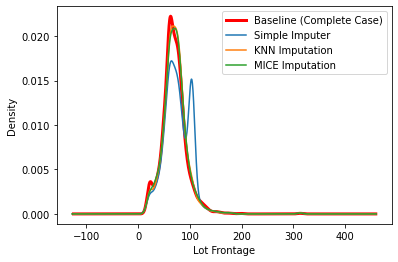

In [ ]:
#Create Density plots
no_missing['LotFrontage'].plot(kind='kde', c='red', linewidth=3)
simple_train_enc['LotFrontage'].plot(kind='kde')
knn_train['LotFrontage'].plot(kind='kde')
mice_train['LotFrontage'].plot(kind='kde')

labels = ['Baseline (Complete Case)', 'Simple Imputer', 'KNN Imputation', 'MICE Imputation']
plt.legend(labels)

plt.xlabel('Lot Frontage')

plt.show()


The density plots show the distribution of "Lot Frontage", a feature with many missing values. It is quite interessting to see that Simple Imputer does a pretty horrible job at approximating the distribution of this feature (the red line). KNN and Mice approximate the dsitribution of "Lot Frontage" mucht better.  The effect on the prediction is small because "Lot Frontage" has im comparisson to some other features a pretty low coefficient. This means that it isn't a very important predictive feature. In a situation where an important feature has a lot of missing values, the results may have been very different.

In [ ]:
#we will use the simple imputed dataframe for feature engineering
cleaned = simple.copy()


## **3 E.D.A & FEATURE ENGINEERING**

where do you start with feature engineering when you still have over 70 features?!

I have done some research on what features that people find important and that drive the housing prices in the US (i.e. people are willing to pay extra for).


*   *Neighborhood* and surrounding area: proximity to work,
recreation, city. Also easy acess to main roads

*   *Lot*: size, lot shape, lot slope etc.

*    *Potential*: space to add for example a garage, bathroom or pool

*   *Bathroom quality*

*   *Kitchen quality*

*   Age, *style and condition* of house and appliances

*   Age of the house: home *less than 5 years old*

*  *Seller’s incentive* to sell

* Features: fire place, eat-in kitchen, stainless steel applieances, kitchen island, ensuite master bath, hardwood floors, granite countertops, walk-in closet, new kitchen appliances, central air conditioning

*   *Home style*: single homes, condo living, town house and building style

*  Enough space: Storage space, number of bedrooms, number of bathrooms, layout 


In [ ]:
# creat a copy of the cleaned data frame to which I will add my new features
engineered = cleaned.copy()
engineered.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [ ]:
# Note: I add Sale Price to all categories for plotting the heatmap

nominal =[ 'MSZoning', 'MSSubClass' , 'Street',  'LotConfig',  'Neighborhood', 'Condition1', 'Condition2',
          'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
          'Foundation',  'Heating','CentralAir', 'Electrical','GarageType', 'PavedDrive', 
          'SaleType', 'SaleCondition', 'MoSold' , 'SalePrice'  ]

ordinal =['ExterQual', 'ExterCond' , 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC' ,  
          'KitchenQual',  'GarageFinish', 'GarageCond', 'GarageQual',  'LotShape',
          'LandContour' , 'LandSlope', 'Utilities', 'Functional' , 'BsmtFinType1' , 'BsmtFinType2' , 'SalePrice'   ]

discrete =['Id', 'OverallQual', 'OverallCond', 'YearBuilt', 'BedroomAbvGr', 'YearRemodAdd', 
           'BsmtFullBath',  'BsmtHalfBath', 'FullBath','HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
            'GarageCars','YrSold', 'SalePrice' ]

continious = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
              '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea','GarageArea', 'WoodDeckSF', 'OpenPorchSF',
              'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'  ]


### **3.1 CONTINIOUS FEATURES**

In [ ]:
cleaned[continious].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,548.0,0,61,0,0,0,0,0,208500.0
1,80.0,9600,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,460.0,298,0,0,0,0,0,0,181500.0
2,68.0,11250,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,608.0,0,42,0,0,0,0,0,223500.0
3,60.0,9550,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,642.0,0,35,272,0,0,0,0,140000.0
4,84.0,14260,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,836.0,192,84,0,0,0,0,0,250000.0


I will create a heatmap to see how the features correlate with each other. This gives me some indication of which features are important and in which features I should invest some time. The most important features (in terms of correlation with Sale Price) are related to the size of the house. 

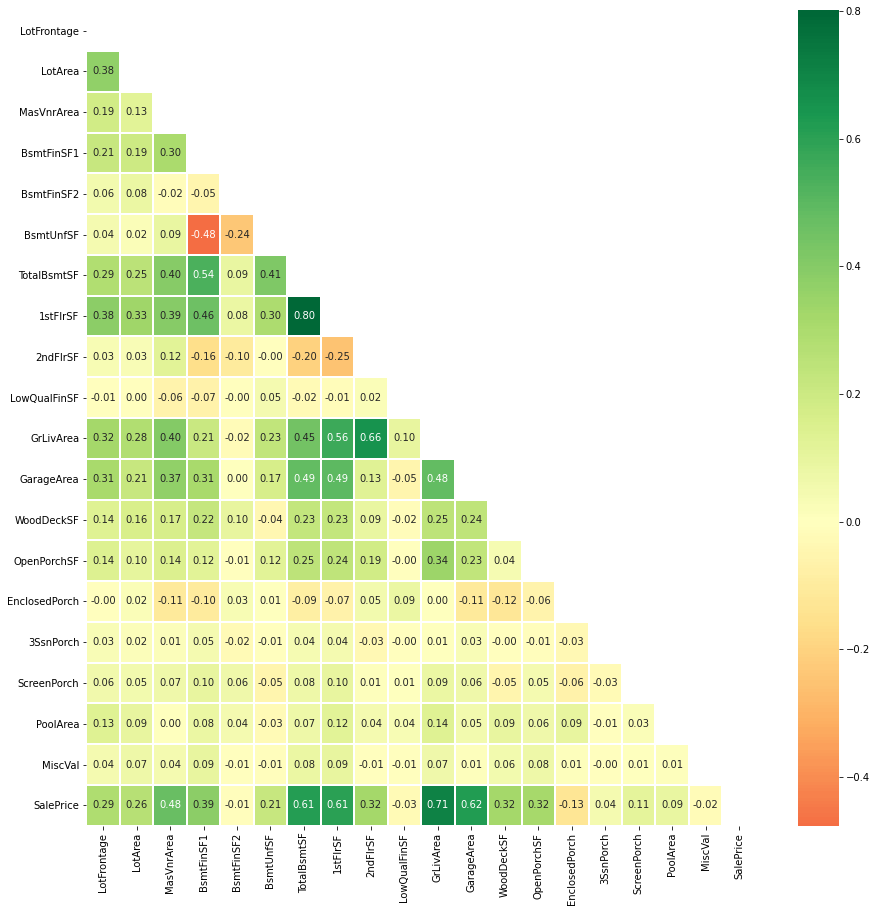

In [ ]:
# Create the correlation matrix
corr = cleaned[continious].corr()

#create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap

sns.heatmap(corr, mask=mask, cmap= "RdYlGn", center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

I want to create a feature that reflect the amount of free space on the lot. This free space could potentially be used to create a garden, extend te house, build a pool etc. I also want to create a feature that indicates whether or not a house has a garage.

SURFACE AREA FEATURES

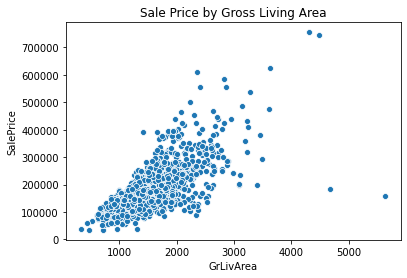

In [ ]:
ax = sns.scatterplot(x="GrLivArea", y = "SalePrice",  data = cleaned)
ax.set(title = 'Sale Price by Gross Living Area')
plt.show()

In [ ]:
# Create a feature for TotalSf
engineered["TotalSF"] = cleaned["GrLivArea"] + cleaned["TotalBsmtSF"]

# Create a feature for Garden
engineered["GardenSF"] = cleaned["LotArea"] - cleaned["1stFlrSF"]

# Create total Porch
engineered["TotalPorchSF"] = cleaned ["WoodDeckSF"] + cleaned["ScreenPorch"] + cleaned["EnclosedPorch"] + cleaned["OpenPorchSF"] + cleaned [ "3SsnPorch"]


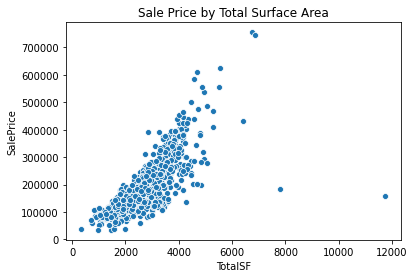

In [ ]:
#check-out newly created feature
ax = sns.scatterplot(x="TotalSF", y = "SalePrice",  data = engineered, palette = "Set2")
ax.set(title = 'Sale Price by Total Surface Area')
plt.show()

HAS FEATURES

In [ ]:
#create binary features to indicate whether the house has a garage, basement or porch
engineered["HasGarage"] = cleaned["GarageArea"].apply(lambda x: 1 if x >0 else 0)
engineered["HasBasement"] = cleaned["TotalBsmtSF"].apply(lambda x: 1 if x >0 else 0)
engineered["HasPorch"] = engineered["TotalPorchSF"].apply(lambda x: 1 if x >0 else 0)

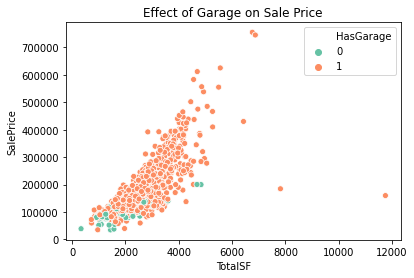

In [ ]:
# Mostly cheap houses don't have a garage
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "HasGarage", data = engineered, palette = "Set2")
ax.set(title = 'Effect of Garage on Sale Price')
plt.show()

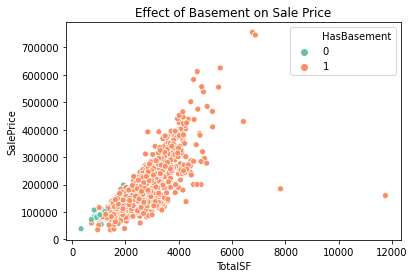

In [ ]:
# Mostly cheap houses don't have a basement
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "HasBasement", data = engineered, palette = "Set2")
ax.set(title = 'Effect of Basement on Sale Price')
plt.show()

POOL AREA

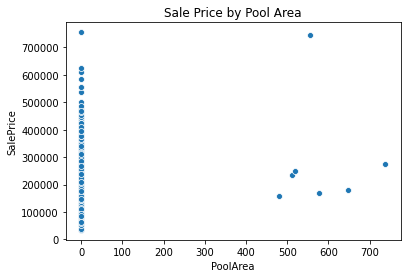

In [ ]:
# We will drop Pool Area because only a handfull of houses have a pool
ax = sns.scatterplot(x="PoolArea", y = "SalePrice", data = cleaned)
ax.set(title = 'Sale Price by Pool Area')
plt.show()

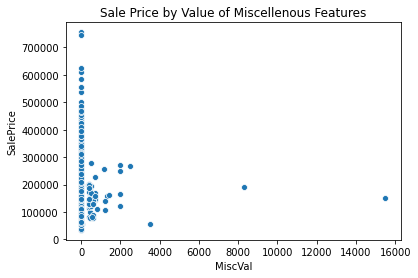

In [ ]:
# We will drop MiscVal because most houses don't have any Miscelaneous features and I don't see a clear pattern with price.
ax = sns.scatterplot(x="MiscVal", y = "SalePrice", data = cleaned)
ax.set(title = 'Sale Price by Value of Miscellenous Features')
plt.show()

LOG SALE PRICE, TOTAL SF & LOT AREA

The last thing I want to check is the distribution of my continous features. Most models assume a normal distribution. Log transformation is only possible for features that don't have a 0 in them.


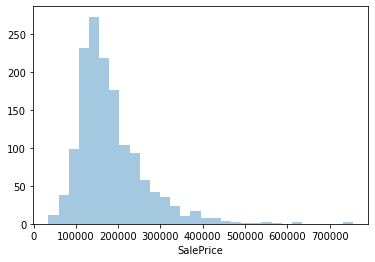

In [ ]:
#plot the distribution of SalePrice
sns.distplot(cleaned["SalePrice"], kde=False, bins=30)

In [ ]:
#Sale Price is pretty skewed
cleaned["SalePrice"].skew()

1.8828757597682129

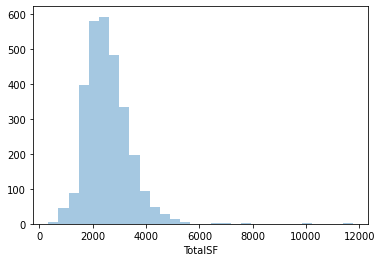

In [ ]:
#plot the distribution of SalePrice
sns.distplot(engineered["TotalSF"], kde=False, bins=30)

In [ ]:
#Total SF is also skewed
engineered["TotalSF"].skew()

1.5119340878632541

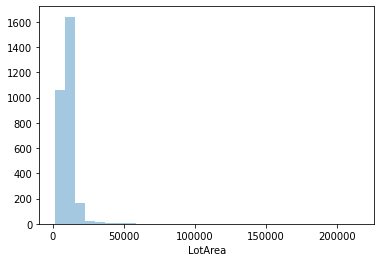

In [ ]:
#plot the distribution of SalePrice
sns.distplot(cleaned["LotArea"], kde=False, bins=30)

In [ ]:
#Lot Area is extremely skewed
cleaned["LotArea"].skew()

12.829024853018762

In [ ]:
# Log normalize the continous features
engineered["SalePriceLog"] = np.log(engineered["SalePrice"])
engineered["LotAreaLog"] = np.log(engineered["LotArea"])
engineered["TotalSFLog"] = np.log(engineered["TotalSF"])
engineered["GardenSFLog"] = np.log(engineered["GardenSF"])


### **3.2 DISCRETE FEATURES**

In [ ]:
cleaned[discrete].head()

,Id,OverallQual,OverallCond,YearBuilt,BedroomAbvGr,YearRemodAdd,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,YrSold,SalePrice
0,1,7,5,2003,3,2003,1.0,0.0,2,1,1,8,0,2.0,2008,208500.0
1,2,6,8,1976,3,1976,0.0,1.0,2,0,1,6,1,2.0,2007,181500.0
2,3,7,5,2001,3,2002,1.0,0.0,2,1,1,6,1,2.0,2008,223500.0
3,4,7,5,1915,3,1970,1.0,0.0,1,0,1,7,1,3.0,2006,140000.0
4,5,8,5,2000,4,2000,1.0,0.0,2,1,1,9,1,3.0,2008,250000.0


I will create another heatmap, this time using spearman correlation. Spearman is better suited for ordinal and discrete features. Pearson is better for continious and categorical features with 2 levels (0-1).

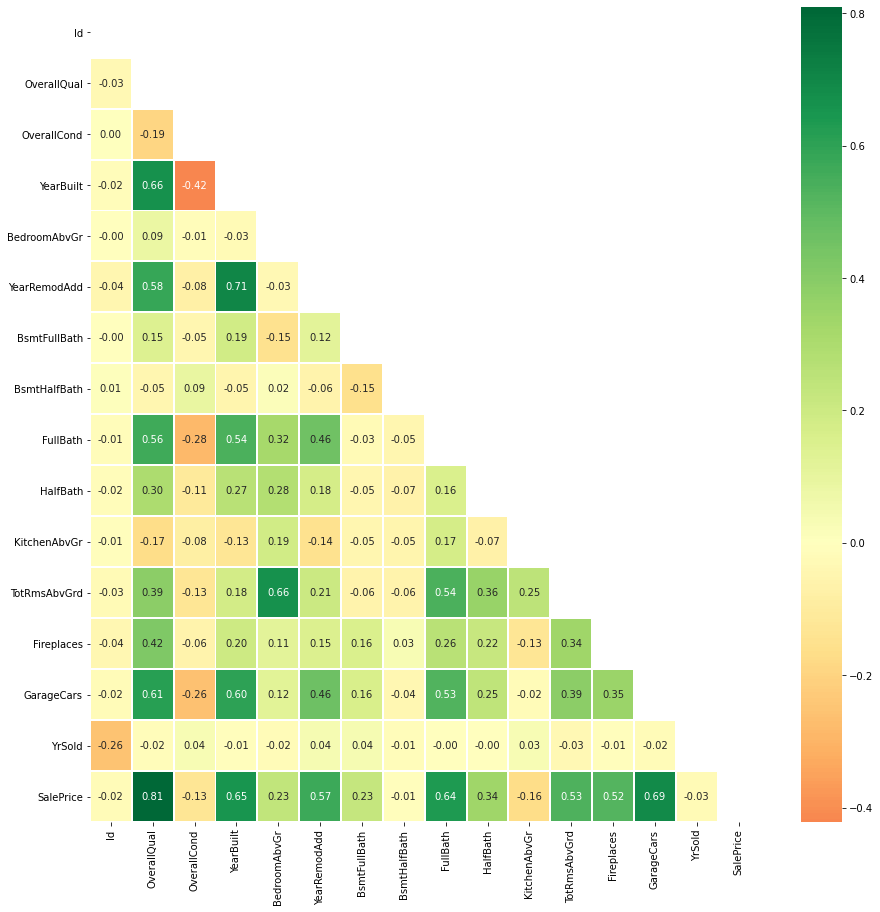

In [ ]:
# Create the correlation matrix
corr = cleaned[discrete].corr(method = "spearman")

# Draw the heatmap
#sns.heatmap(corr,  cmap= "magma", center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

#draw the heatmap but remove redundant information
#create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(corr, mask=mask, cmap= "RdYlGn", center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

There are quite a few features that show a nice correlation with Sale Price. We will explore them and create some new features.

MSSUBCLASS

MSSubClass is more of a categorical feature. We will change it's data type and add it to the Nominal Features list.

In [ ]:
#change data type
cleaned["MSSubClass"] = cleaned["MSSubClass"].astype("str")

OVERALL QUALITY

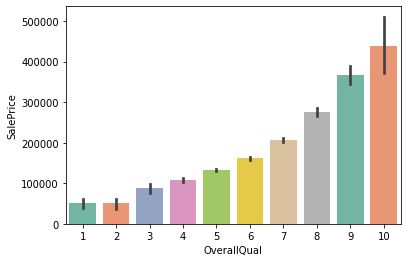

In [ ]:
#Overal Quality is pretty good indicator of Price
sns.barplot(x="OverallQual", y="SalePrice", data = cleaned, palette = "Set2")
ax.set(title = 'Effect of Overall Quality on Sale Price')
plt.show()

OVERALL CONDITION

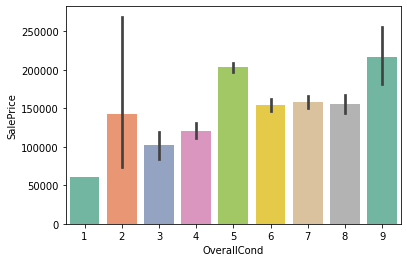

In [ ]:
#Overal Condition is a much less reliable feature. I will therefore drop it.
sns.barplot(x="OverallCond", y="SalePrice", data = cleaned, palette = "Set2")
ax.set(title = 'Effect of Overall Condition on Sale Price')
plt.show()

AGE

We know that the Age of a house is an important determinant of price. I want to calculate the Age of the house when sold by calculating the difference between Year Sold and Year Build. I also want to create a feature that indicates whether or not a house is new or not. I will also keep the Year Sold as a feature, because the prices of houses change over time due to the market.

In [ ]:
# Create feature Age Sold and New House (House younger than 5 years)
engineered["AgeSold"] = cleaned["YrSold"] - cleaned["YearBuilt"]
engineered["NewHouse"] = engineered["AgeSold"].apply(lambda x: 1 if x < 5 else 0)

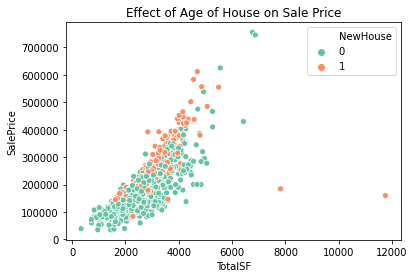

In [ ]:
# New houses sell for higher prices than houses that are older than 5 years
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "NewHouse", data = engineered, palette = "Set2")
ax.set(title = 'Effect of Age of House on Sale Price')
plt.show()

NUMBER OF BEDROOMS

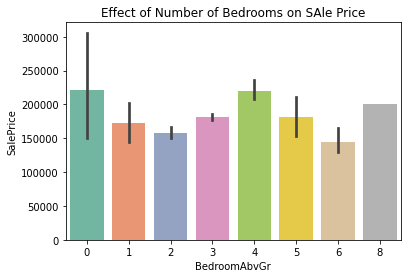

In [ ]:
#The number of bedrooms don't show a great pattern
ax =  sns.barplot(x="BedroomAbvGr", y="SalePrice", data = cleaned, palette = "Set2")
ax.set(title = "Effect of Number of Bedrooms on SAle Price")
plt.show()

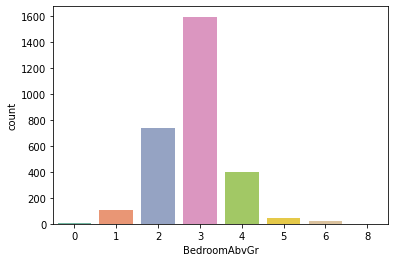

In [ ]:
#There are hardly any houses with 5 or more bedrooms 
sns.countplot(x="BedroomAbvGr", data = cleaned, palette = "Set2")
ax.set (title = "Bedroom Count")
plt.show()

RENOVATED

I think the years since renovation is an interessting feature. It would probably indicate houses with nices features and a better overall condition.

In [ ]:
# Create feature Age Sold and New House (House younger than 5 years)
engineered["YearsRenovated"] = cleaned["YrSold"] - cleaned["YearRemodAdd"]
engineered["RecentRenovated"] = engineered["YearsRenovated"].apply(lambda x: 1 if x < 5 else 0)

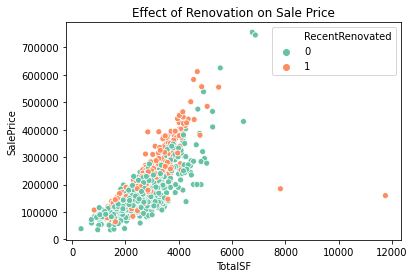

In [ ]:
# Renovated houses sell for higher prices
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "RecentRenovated", data = engineered, palette = "Set2")
ax.set(title = 'Effect of Renovation on Sale Price')
plt.show()

TOTAL BATH

In [ ]:
# create a feature for TotalBath
engineered["TotalBath"] = cleaned["FullBath"] + cleaned["HalfBath"] * 0.5

<function matplotlib.pyplot.show>

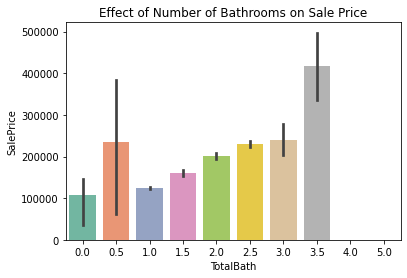

In [ ]:
#having more bathrooms boosts the price of a house
ax = sns.barplot(x="TotalBath", y="SalePrice", data = engineered, palette = "Set2")
ax.set (title = "Effect of Number of Bathrooms on Sale Price")
plt.show

KITCHEN GRADE

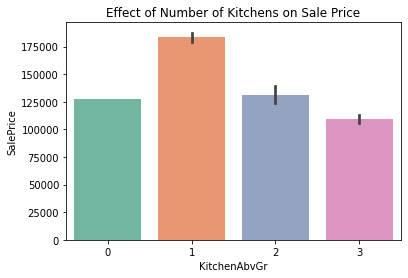

In [ ]:
# We will drop Kitchen Grade because most houses have only 1 kitchen
ax = sns.barplot(x="KitchenAbvGr", y="SalePrice", data = cleaned, palette = "Set2")
ax.set ( title = "Effect of Number of Kitchens on Sale Price")
plt.show()

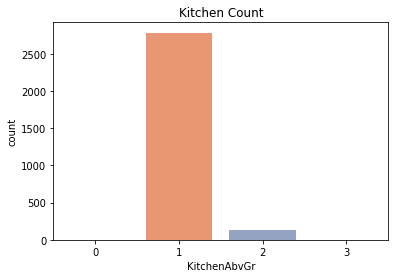

In [ ]:
# nearly all houses have 1 kitchen
ax = sns.countplot(x="KitchenAbvGr", data=cleaned, palette = "Set2")
ax.set (title = "Kitchen Count")
plt.show()

TOTAL ROOMS

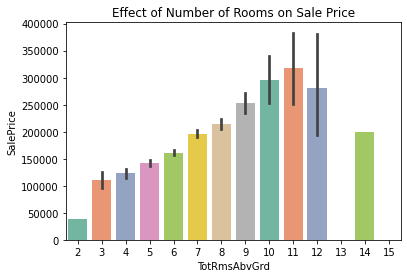

In [ ]:
# Houses with more rooms sell for a higher price
ax = sns.barplot(x="TotRmsAbvGrd", y="SalePrice", data = cleaned, palette = "Set2")
ax.set ( title = "Effect of Number of Rooms on Sale Price")
plt.show()

FIRE PLACE

Fireplaces are mentioned as a price boosting feature. I don't think the number of fire places matters, so I will turn this feature into a binary feature.

In [ ]:
# create feature: has fireplace
engineered["HasFireplace"] = cleaned["Fireplaces"].apply(lambda x: 1 if x >0 else 0)

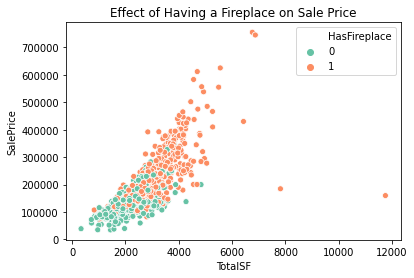

In [ ]:
# More expensive houses generally have a fireplace
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "HasFireplace", data = engineered, palette = "Set2")
ax.set(title = 'Effect of Having a Fireplace on Sale Price')
plt.show()

GARAGE SIZE

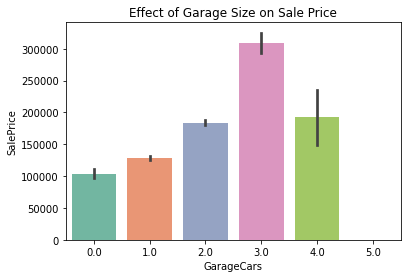

In [ ]:
# Bigger garages sell for a higher price, so we will keep this feature for now
ax = sns.barplot(x="GarageCars", y="SalePrice", data = cleaned, palette = "Set2")
ax.set (title = "Effect of Garage Size on Sale Price")
plt.show()

YEAR SOLD

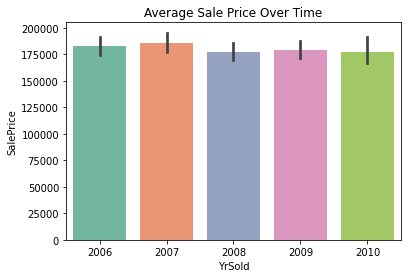

In [ ]:
# The house prices are fairly stable over time. The prices seem to drop a bit after the economical crisis of 2008, so this might be interessting
ax = sns.barplot(x="YrSold", y="SalePrice", data = cleaned, palette  = "Set2")
ax.set (title = "Average Sale Price Over Time")
plt.show()

### **3.3 NOMINAL FEATURES**

In [ ]:
cleaned[nominal].head()

,MSZoning,MSSubClass,Street,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,PavedDrive,SaleType,SaleCondition,MoSold,SalePrice
0,RL,60,Pave,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,Y,WD,Normal,2,208500.0
1,RL,20,Pave,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Y,SBrkr,Attchd,Y,WD,Normal,5,181500.0
2,RL,60,Pave,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,Y,WD,Normal,9,223500.0
3,RL,70,Pave,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,Y,SBrkr,Detchd,Y,WD,Abnorml,2,140000.0
4,RL,60,Pave,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,Y,WD,Normal,12,250000.0


MS ZONING

MS Zoning is an interessting feature. Most houses are found in a Low density areas. The few houses that are not, are quite a bit cheaper. I figured there might be a relationship with the neighborhood (so I could drop the feature entirely). The cheaper houses are indeed found in cheaper neighborhoods, so I will drop this feature.

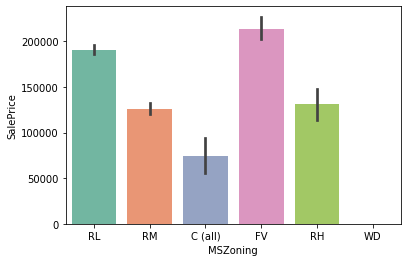

In [ ]:
sns.barplot(x="MSZoning", y="SalePrice", data = cleaned, palette = "Set2")
ax.set (title = "Sale Price By Zoning Classification")
plt.show()

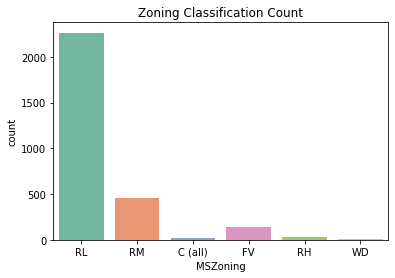

In [ ]:
#most houses are found in low residential areas
ax = sns.countplot(x = "MSZoning", data = cleaned, palette = "Set2")
ax.set (title = "Zoning Classification Count")
plt.show()

In [ ]:
#check in what neighborhooods medium density houses are mostly found
zoningRM= cleaned[cleaned["MSZoning"]== "RM"]
print(zoningRM['Neighborhood'].value_counts())

OldTown    198
IDOTRR      68
BrkSide     65
MeadowV     37
BrDale      30
CollgCr     14
Edwards     12
Crawfor     10
Blueste     10
Mitchel      9
Sawyer       3
Blmngtn      3
NridgHt      1
Name: Neighborhood, dtype: int64


In [ ]:
#check in what neighborhooods low density houses are mostly found
zoningRL= cleaned[cleaned["MSZoning"]== "RL"]
print(zoningRL['Neighborhood'].value_counts())

NAmes      436
CollgCr    253
Edwards    180
Gilbert    165
NridgHt    165
Sawyer     148
NWAmes     131
SawyerW    119
Mitchel    104
Crawfor     91
Timber      72
NoRidge     71
StoneBr     51
ClearCr     44
Somerst     43
BrkSide     43
OldTown     39
SWISU       38
Blmngtn     25
Veenker     24
NPkVill     23
Name: Neighborhood, dtype: int64


 MS SUBCLASS

MSSubClass is a pretty messy feature. It has a lot of different categories, but most houses are 1 story > 1946. The style and age of the house are in my opinion better covered by other features, so I will drop MSSubClass.

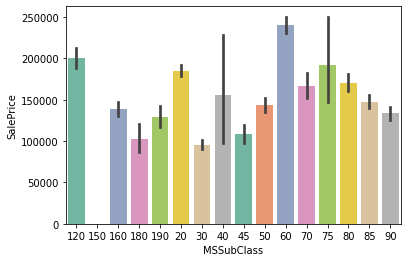

In [ ]:
sns.barplot(x="MSSubClass", y="SalePrice", data = cleaned, palette = "Set2")
ax.set (title = "Sale Price by MS Subclass category")
plt.show()

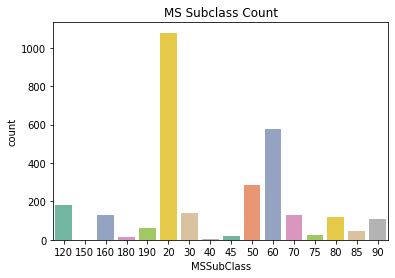

In [ ]:
#Most houses are 1 story 1946 & newer houses
ax = sns.countplot(x = "MSSubClass", data = cleaned, palette = "Set2")
ax.set (title = "MS Subclass Count")
plt.show()

STREET

Pretty much all houses (all but 12!)have Paved road access to the property, so I will drop this feature.

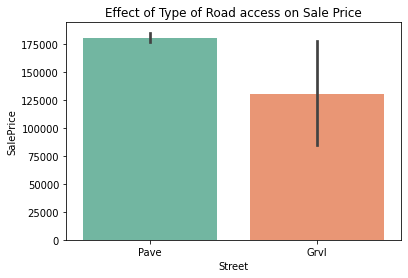

In [ ]:
#Paved road access is better than gravel road access
ax = sns.barplot(x="Street", y="SalePrice", data = cleaned, palette = "Set2")
ax.set (title = "Effect of Type of Road access on Sale Price")
plt.show()

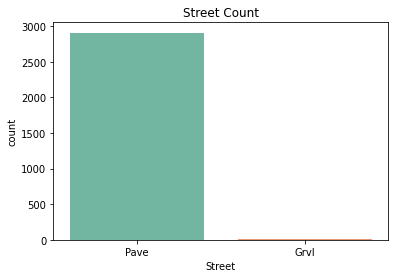

In [ ]:
ax = sns.countplot(x = "Street", data = cleaned, palette = "Set2")
ax.set(title = "Street Count")
plt.show()

LOT CONFIGURATION

Lot Configuration is an interesting feature. This feature has to do with the location of the house, and it therefore potentially interesting. With the exception of Cul de Sacs, there isn't a clear price pattern visible. I would have expected to see mor for the category Corner as well. I feel most confident about creating a sepperate feature for Cul de Sac.

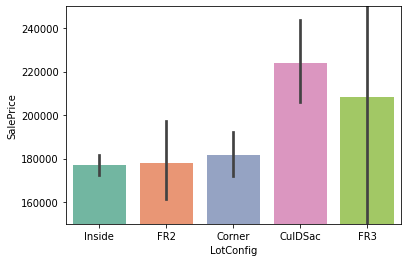

In [ ]:
#Houses on Cul de Sacs sell for higher prices
plt.ylim(150000, 250000)
sns.barplot(x= "LotConfig", y="SalePrice", data = cleaned, palette = "Set2")
ax.set (title = "Effect of Lot Configuration on Sale Price")
plt.show()

In [ ]:
# create feature: CulDSac
engineered["CulDSac"] = cleaned["LotConfig"].apply(lambda x: 1 if x =="CulDSac" else 0)

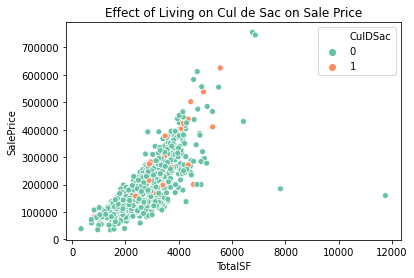

In [ ]:
# The pattern isn't as clear as some of the other binary features
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "CulDSac", data = engineered, palette = "Set2")
ax.set(title = 'Effect of Living on Cul de Sac on Sale Price')
plt.show()

NEIGHBORHOOD

The neighborhood you live in is important for the price of a house. I will therefore Onehot encode the different neighborhoods.

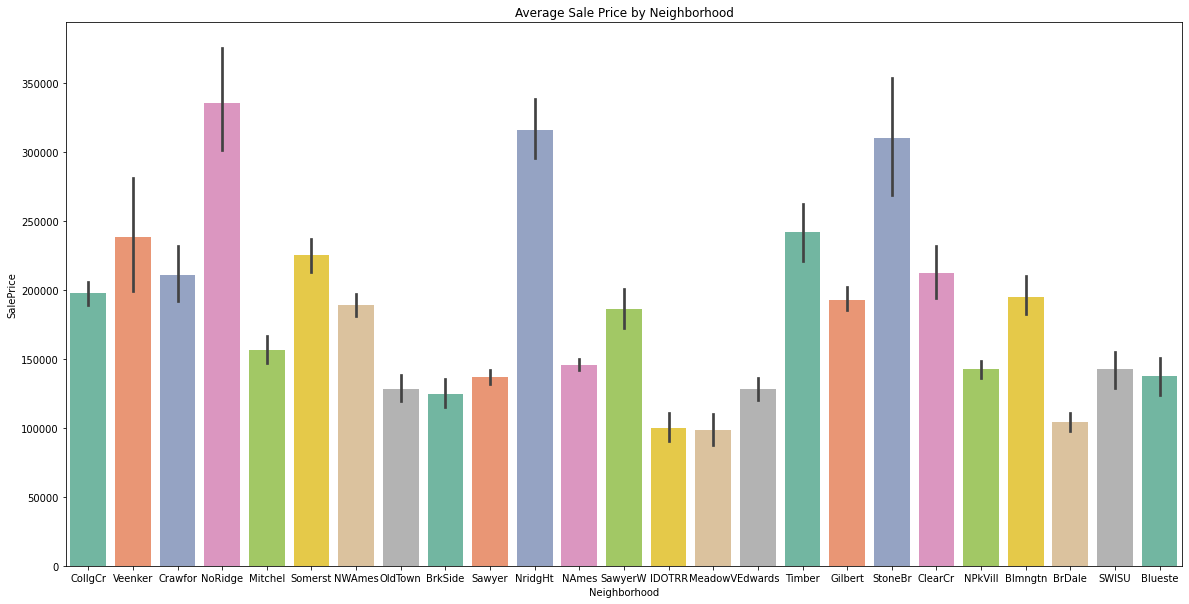

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))  
ax = sns.barplot(x="Neighborhood", y="SalePrice", data = cleaned, palette = "Set2")
ax.set (title = "Average Sale Price by Neighborhood")
plt.show()

In [ ]:
ohe = pd.get_dummies(cleaned['Neighborhood'], prefix="NH")
 
# Concatenate this set back to the ufo DataFrame
engineered = pd.concat([engineered, ohe], axis=1)

CONDITION 1 & 2

Condition 1 and Condition 2 describe the proximity of house to the train, big roads and green  space. I want to reduce the number of categories here.

[]

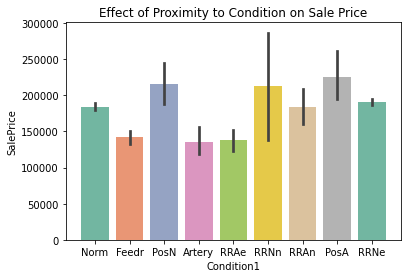

In [ ]:
ax = sns.barplot(x= "Condition1", y="SalePrice", data = cleaned, palette = "Set2")
ax.set (title = "Effect of Proximity to Condition on Sale Price")
plt.plot()

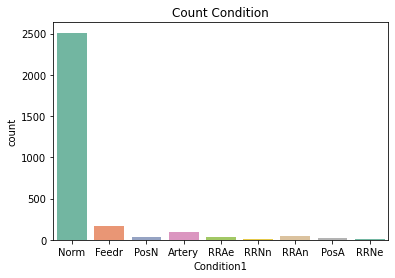

In [ ]:
#most houses aren't located in close proximity to a road or rail
ax =sns.countplot(x = "Condition1", data = cleaned, palette = "Set2")
ax.set (title = "Count Condition")
plt.show()

NEAR STREET

In [ ]:
#Create feature "Near Street" if house is close an artery or feeder road
mask_street = (engineered["Condition1"] == "Artery" ) | (engineered["Condition2"] == "Artery" )| (engineered["Condition1"] == "Feedr" ) | (engineered["Condition2"] == "Feedr")
engineered["NearStreet"] = 0
engineered.loc[mask_street, "NearStreet"] = 1

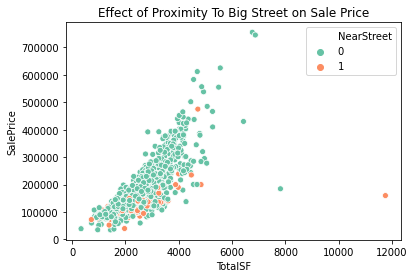

In [ ]:
# The more expensive houses are located in proximity to a big street
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "NearStreet", data = engineered, palette = "Set2")
ax.set(title = 'Effect of Proximity To Big Street on Sale Price')
plt.show()

NEAR PARK

In [ ]:
#Create feature "Near Park" if house is close to an park
mask_park = (engineered["Condition1"] == "PosN" ) | (engineered["Condition2"] == "PosN" )| (engineered["Condition1"] == "PosA" ) | (engineered["Condition2"] == "PosA")
engineered["NearPark"] = 0
engineered.loc[mask_park, "NearPark"] = 1

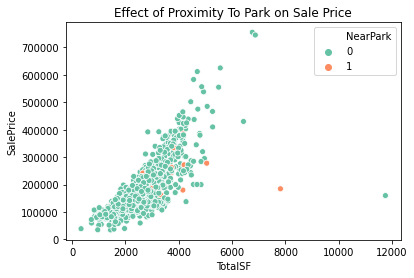

In [ ]:
# Living near a park doesn't seem to have a big effect
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "NearPark", data = engineered, palette = "Set2")
ax.set(title = 'Effect of Proximity To Park on Sale Price')
plt.show()

NEAR TRAIN

In [ ]:
#Create feature "Near Train " if house is close to a railway
mask_train = (engineered["Condition1"] == "RRNn" ) | (engineered["Condition2"] == "RRNn" )| (engineered["Condition1"] == "RRAn" ) | (engineered["Condition2"] == "RRAn") | (engineered["Condition1"] == "RRNe" ) | (engineered["Condition2"] == "RRNe") | (engineered["Condition1"] == "RRAe" ) | (engineered["Condition2"] == "RRAe")
engineered["NearTrain"] = 0
engineered.loc[mask_train, "NearTrain"] = 1

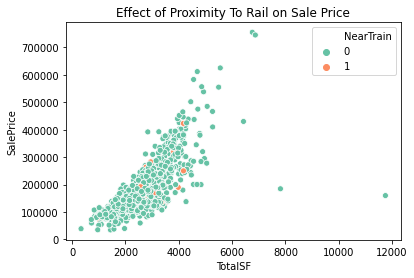

In [ ]:
# Living close to a rail doesn't seem to have a big effect on price
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "NearTrain", data = engineered, palette = "Set2")
ax.set(title = 'Effect of Proximity To Rail on Sale Price')
plt.show()

BUILDING TYPE

I expected that the type of house matters. However, most houses in Ames are 1 family homes. I don't see a very clear pattern where other types of houses are more or less expensive, so I will drop this feature.

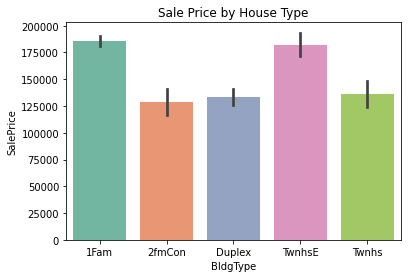

In [ ]:
# 1 family homes and town houses sell for the highest prices
ax = sns.barplot(x= "BldgType", y="SalePrice", data = cleaned, palette = "Set2")
ax.set (title = "Sale Price by House Type")
plt.show()

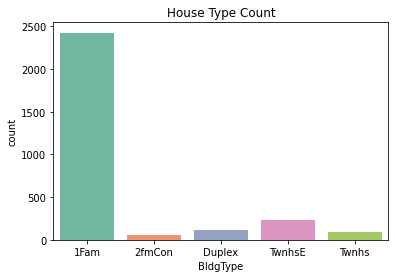

In [ ]:
#by far most houses are 1 family homes
ax = sns.countplot(x = "BldgType", data = cleaned, palette = "Set2")
ax.set (title = "House Type Count")
plt.show()

HOUSE STYLE

There are quite a few categories in this feature, but the clearest pattern that I see is the difference in price between 1 Story houses and other types. 1 Story houses appear on average to be a bit more expensive than multi-level houses. I will therefore create a feature for this. 

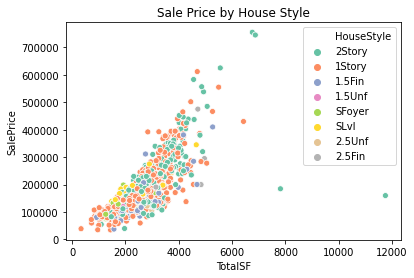

In [ ]:
# 1 story homes seem on average a bit more expensive than other types of houses
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "HouseStyle", data = engineered, palette = "Set2")
ax.set (title = "Sale Price by House Style")
plt.show()

In [ ]:
# create feature: SingleLevel
engineered["SingleLevel"] = cleaned["HouseStyle"].apply(lambda x: 1 if x =="1Story" else 0)

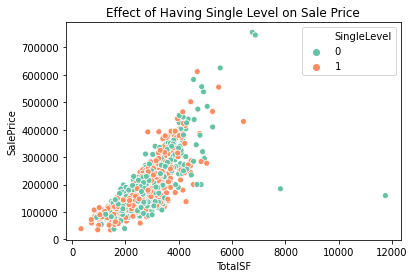

In [ ]:
# 1 story homes seem on average a bit more expensive than other types of houses
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "SingleLevel", data = engineered, palette = "Set2")
ax.set (title = "Effect of Having Single Level on Sale Price")
plt.show()

ROOF STYLE

Houses with Hip roofs are on average sold for slightly more money. The pattern isn't clear enough for me to create a sepperate feature. I also don't think that - logically - the style of the roof is a very important driver of price. I will drop this feature.

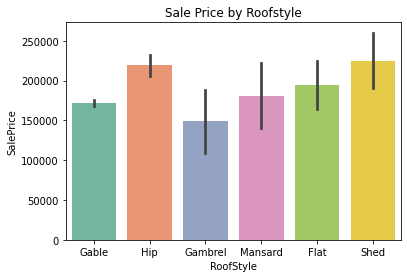

In [ ]:
ax = sns.barplot(x= "RoofStyle", y="SalePrice", data = cleaned, palette = "Set2")
ax.set (title = "Sale Price by Roofstyle")
plt.show()

ROOF MATERIAL

Pretty much all houses have the same roof material. I will drop this feature.

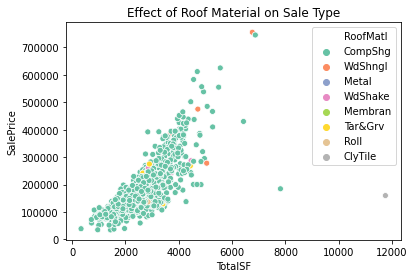

In [ ]:
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "RoofMatl", data = engineered, palette = "Set2")
ax.set (title = "Effect of Roof Material on Sale Type")
plt.show()


EXTERIOR 

This feature is related to the exterior of the house. The appearance of the house matters but this is a pretty messy feature with a lot of different categories. I don't see a very clear pattern in the data, so I will drop this feature.

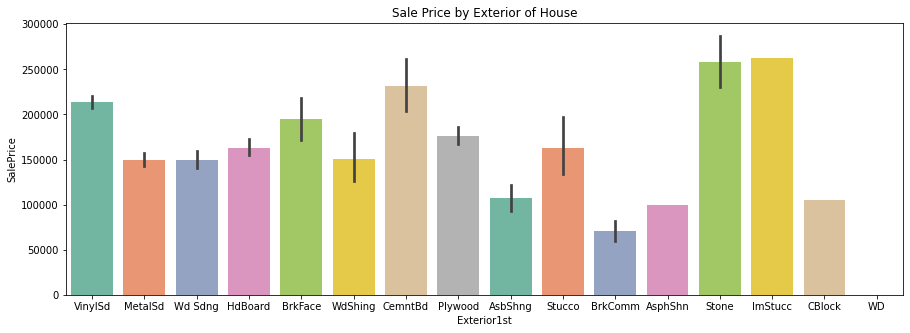

In [ ]:
fig, ax = plt.subplots(figsize=(15,5)) 
ax = sns.barplot(x= "Exterior1st", y="SalePrice", data = cleaned, palette = "Set2")
ax.set (title = "Sale Price by Exterior of House")
plt.show()

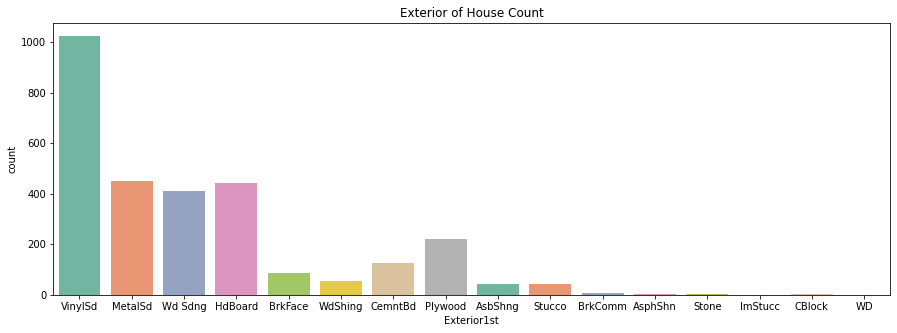

In [ ]:
#most houses have a vinyl finish
fig, ax = plt.subplots(figsize=(15,5)) 
ax = sns.countplot(x= "Exterior1st",  data = cleaned, palette = "Set2")
ax.set (title = "Exterior of House Count")
plt.show()

MASONRY VENEER TYPE

Mose houses have no Masonry, but houses with a Brick Face or Stone are on average a bit more expensive. I will create a feature for this.

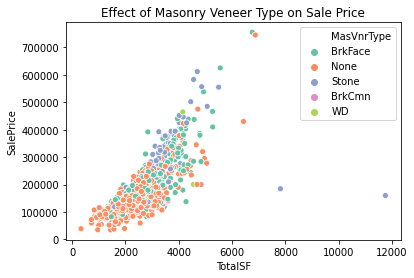

In [ ]:
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "MasVnrType", data = engineered, palette =  "Set2")
ax.set (title = "Effect of Masonry Veneer Type on Sale Price")
plt.show()

In [ ]:
# create feature: Has Masonry
engineered["HasMasonry"] = cleaned["MasVnrType"].apply(lambda x: 1 if x != "None" else 0)

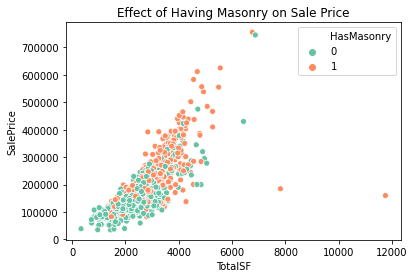

In [ ]:
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "HasMasonry", data = engineered, palette =  "Set2")
ax.set (title = "Effect of Having Masonry on Sale Price")
plt.show()

FOUNDATION

houses with different types of foundation have quite different price points. Poured concrete, Cylinder blocks and Brick & Tile show the clearest pattern, but I will One hot encode the feature in its entiety. 

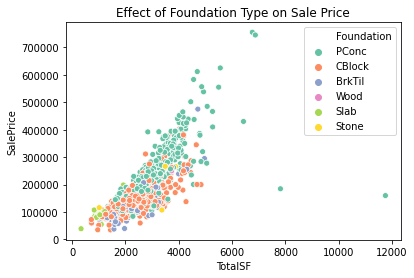

In [ ]:
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "Foundation", data = engineered, palette =  "Set2")
ax.set (title = "Effect of Foundation Type on Sale Price")
plt.show()

In [ ]:
ohe = pd.get_dummies(cleaned['Foundation'], prefix="Found")
 
# Concatenate this set back to the ufo DataFrame
engineered = pd.concat([engineered, ohe], axis=1)

HEATING

This feature shows very little variation, so I will drop it.

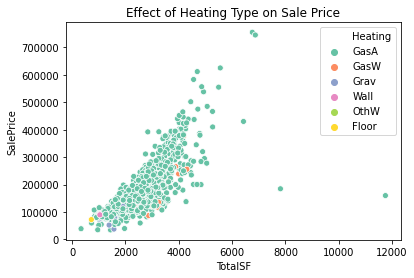

In [ ]:
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "Heating", data = engineered, palette =  "Set2")
ax.set (title = "Effect of Heating Type on Sale Price")
plt.show()


CENTRAL AIR

Central Air is described as an important feature. I will keep it, but turn it into a binary feature.

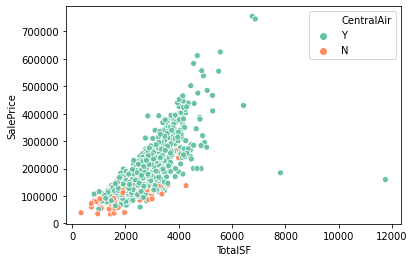

In [ ]:
sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "CentralAir", data = engineered, palette  = "Set2")
ax.set (title = "Effect of Having Central Air on Sale Price")
plt.show()


In [ ]:
# create feature: Has CentralAir
engineered["HasCentralAir"] = cleaned["CentralAir"].apply(lambda x: 1 if x == "Y" else 0)

ELECTRICAL

This feature shows little variation so I will drop it.

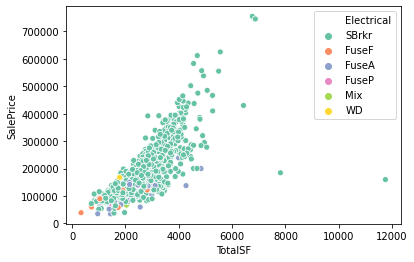

In [ ]:
sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "Electrical", data = engineered, palette =  "Set2")
ax.set (title = "Effect of Electrical Type on Sale Price")
plt.show()


GARAGE TYPE

Houses with attached or Built in garages are a bit more appealing than other types of garages. I could group CarPort, Basment and 2Types into a single category, but I think this feature would get removed during feature selection anyway, so I'll encode the entire feature for now.

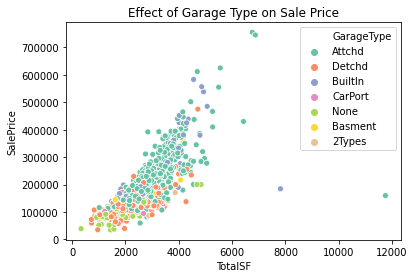

In [ ]:
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "GarageType", data = engineered, palette =  "Set2")
ax.set (title = "Effect of Garage Type on Sale Price")
plt.show()

In [ ]:
ohe = pd.get_dummies(cleaned['GarageType'], prefix="Garage")
 
# Concatenate this set back to the ufo DataFrame
engineered = pd.concat([engineered, ohe], axis=1)

PAVED DRIVE

This feature doesn't show a lot of variation so I will drop it.

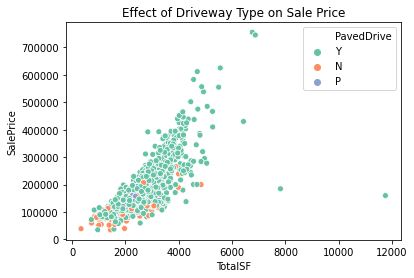

In [ ]:
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "PavedDrive", data = engineered, palette = "Set2")
ax.set (title = "Effect of Driveway Type on Sale Price")
plt.show()

SALE TYPE

New Houses are sold for higher prices. This information is already covered in the feature NewHouse so I will drop this feature.

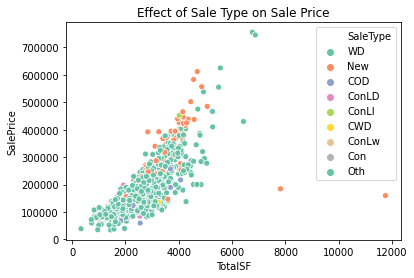

In [ ]:
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "SaleType", data = engineered, palette = "Set2")
ax.set (title = "Effect of Sale Type on Sale Price")
plt.show()

SALE CONDITION

Partial sales are associated with New Houses and show great overlap with the feature New House. Abnormal Sales are a good way to get a cheap house. I will create a feature for this category, but it may have to little variance to be interessting.

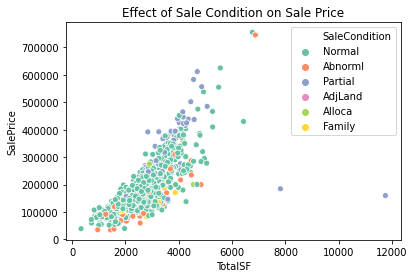

In [ ]:
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "SaleCondition", data = engineered, palette = "Set2")
ax.set (title = "Effect of Sale Condition on Sale Price")
plt.show()

In [ ]:
# create feature: Has CentralAir
engineered["AbnormalSale"] = cleaned["SaleCondition"].apply(lambda x: 1 if x == "Abnorml" else 0)

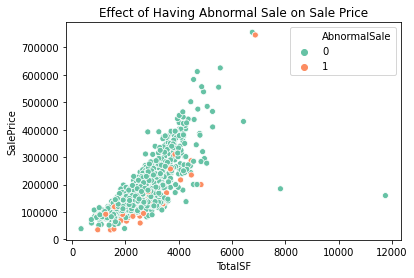

In [ ]:
#the feature is pretty messy but I will keep it for now
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "AbnormalSale", data = engineered, palette = "Set2")
ax.set (title = "Effect of Having Abnormal Sale on Sale Price")
plt.show()

MONTH SOLD

Spring is said to be the best month to sell a house. Most houses are indeed sold in the months May, June and July. Houses are however not more or less expensive in these months. I will drop this feature because I don't see a clear pattern.

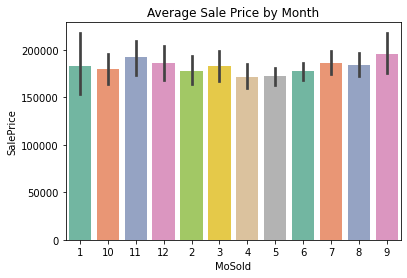

In [ ]:
ax = sns.barplot(x= "MoSold", y="SalePrice", data = cleaned, palette = "Set2")
ax.set (title = "Average Sale Price by Month")
plt.show()

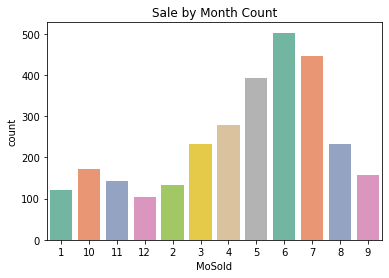

In [ ]:
#most houses are sold in May, June and July
ax = sns.countplot(x = "MoSold", data = cleaned, palette = "Set2")
ax.set (title = "Sale by Month Count")
plt.show()

### **3.4 ORDINAL FEATURES**

The key with ordinal features is that they have some kind of order. I want to retain this order when I encode the features that are interessting.

In [ ]:
cleaned[ordinal].head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,KitchenQual,GarageFinish,GarageCond,GarageQual,LotShape,LandContour,LandSlope,Utilities,Functional,BsmtFinType1,BsmtFinType2,SalePrice
0,Gd,TA,Gd,TA,No,Ex,Gd,RFn,TA,TA,Reg,Lvl,Gtl,AllPub,Typ,GLQ,Unf,208500.0
1,TA,TA,Gd,TA,Gd,Ex,TA,RFn,TA,TA,Reg,Lvl,Gtl,AllPub,Typ,ALQ,Unf,181500.0
2,Gd,TA,Gd,TA,Mn,Ex,Gd,RFn,TA,TA,IR1,Lvl,Gtl,AllPub,Typ,GLQ,Unf,223500.0
3,TA,TA,TA,Gd,No,Gd,Gd,Unf,TA,TA,IR1,Lvl,Gtl,AllPub,Typ,ALQ,Unf,140000.0
4,Gd,TA,Gd,TA,Av,Ex,Gd,RFn,TA,TA,IR1,Lvl,Gtl,AllPub,Typ,GLQ,Unf,250000.0


EXTERNAL QUALITY

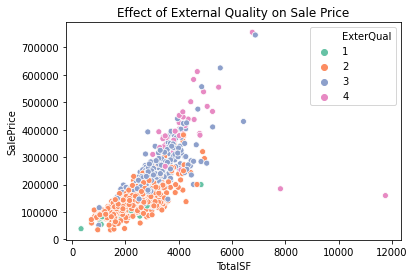

In [ ]:
#The higher the quality, the better the price
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "ExterQual", data = engineered, palette = "Set2")
ax.set (title = "Effect of External Quality on Sale Price")
plt.show()

In [ ]:
# Encode External Quality
scale_mapper = {'Fa':1, 
                'TA':2,
                'Gd':3,
                'Ex' :4}

# Map feature values to scale
engineered['ExterQual'] = cleaned['ExterQual'].replace(scale_mapper)

EXTERNAL CONDITION

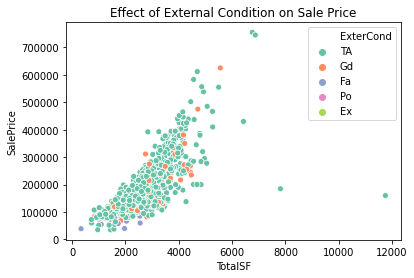

In [ ]:
#Check External Condition: Doesn't show a clear relation with price and will be dropped
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "ExterCond", data = engineered, palette = "Set2")
ax.set (title = "Effect of External Condition on Sale Price")
plt.show()

BASEMENT QUALITY

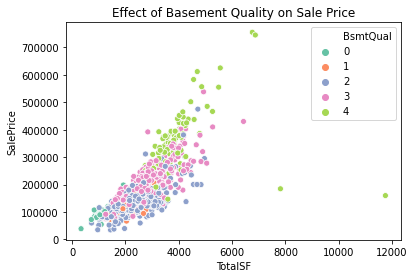

In [ ]:
# A nice basement boosts the price of the house
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "BsmtQual", data = engineered, palette = "Set2")
ax.set (title = "Effect of Basement Quality on Sale Price")
plt.show()

In [ ]:
# Encode External Quality
scale_mapper = {'None': 0,
                'Fa':1, 
                'TA':2,
                'Gd':3,
                'Ex' :4}

# Map feature values to scale
engineered['BsmtQual'] = cleaned['BsmtQual'].replace(scale_mapper)

BASEMENT CONDITION

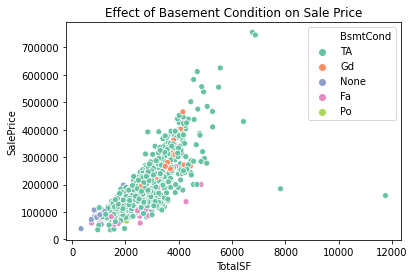

In [ ]:
#Check Basement Condition: Doesn't show a clear relation with price and will be dropped
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "BsmtCond", data = engineered, palette = "Set2")
ax.set (title = "Effect of Basement Condition on Sale Price")
plt.show()

BASEMENT EXPOSURE

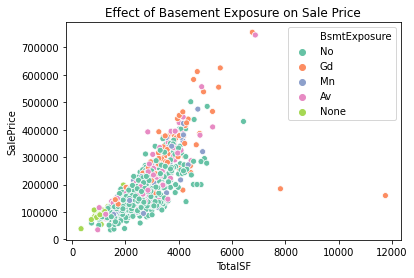

In [ ]:
#Check Basement Exposure: Doesn't show a clear relation with price and will be dropped
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "BsmtExposure", data = engineered, palette = "Set2")
ax.set (title = "Effect of Basement Exposure on Sale Price")
plt.show()

HEATING QUALITY

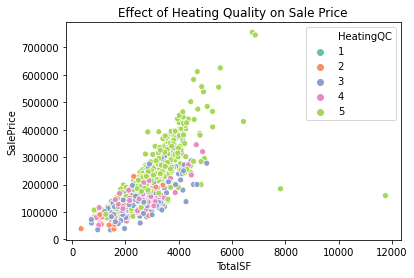

In [ ]:
#Excellent heating really boosts the price of a house
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "HeatingQC", data = engineered, palette = "Set2")
ax.set (title = "Effect of Heating Quality on Sale Price")
plt.show()

In [ ]:
# Encode Heating Quality
scale_mapper = {'Po': 1,
                'Fa':2, 
                'TA':3,
                'Gd':4,
                'Ex' :5}

# Map feature values to scale
engineered['HeatingQC'] = cleaned['HeatingQC'].replace(scale_mapper)

KITCHEN QUALITY

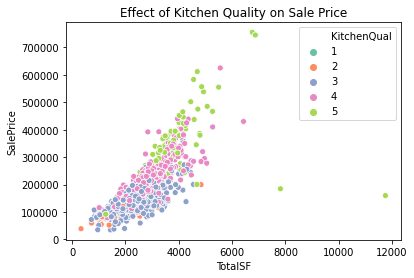

In [ ]:
#A nice kitchen is good for the sale price of the house
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "KitchenQual", data = engineered, palette = "Set2")
ax.set (title = "Effect of Kitchen Quality on Sale Price")
plt.show()

In [ ]:
# Encode Kitchen Quality
scale_mapper = {'WD': 1,
                'Fa':2, 
                'TA':3,
                'Gd':4,
                'Ex' :5}

# Map feature values to scale
engineered['KitchenQual'] = cleaned['KitchenQual'].replace(scale_mapper)

GARAGE FINISH

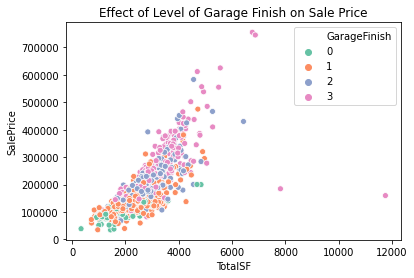

In [ ]:
#A finished garage boosts the price
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "GarageFinish", data = engineered, palette = "Set2")
ax.set (title = "Effect of Level of Garage Finish on Sale Price")
plt.show()

In [ ]:
# Encode Garage Finish
scale_mapper = {'None': 0,
                'Unf':1, 
                'RFn':2,
                'Fin':3}

# Map feature values to scale
engineered['GarageFinish'] = cleaned['GarageFinish'].replace(scale_mapper)

GARAGE CONDITION

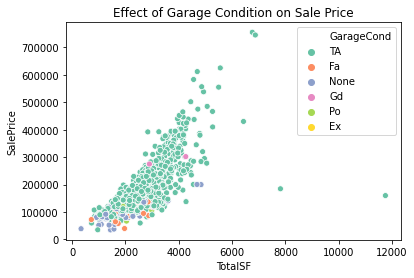

In [ ]:
#Check Garage Condition: Doesn't show a clear relation with price and will be dropped
ax =sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "GarageCond", data = engineered, palette = "Set2")
ax.set (title = "Effect of Garage Condition on Sale Price")
plt.show()

GARAGE QUALITY

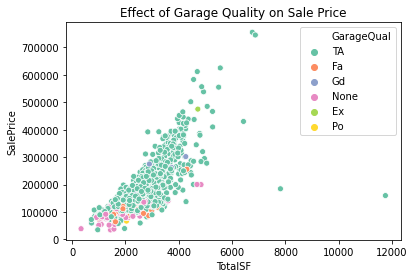

In [ ]:
#Check Garage Quality: Doesn't have a lot of variation. Garage Finish shows a clearer pattern. Drop feature.
ax =sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "GarageQual", data = engineered, palette = "Set2")
ax.set (title = "Effect of Garage Quality on Sale Price")
plt.show()

LOT SHAPE

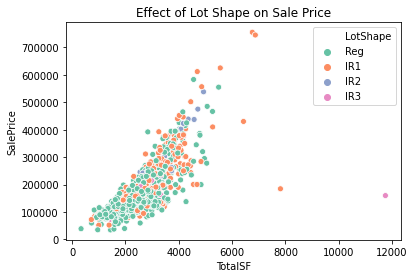

In [ ]:
#Check Lot Shape: Cheaper houses generally have a regular shape and more expensive houses a slightly irregular shape
# I don't think this feature adds much new information so I will drop it 
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "LotShape", data = engineered, palette = "Set2")
ax.set (title = "Effect of Lot Shape on Sale Price")
plt.show()

LAND CONTOUR

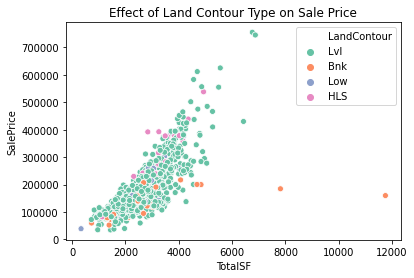

In [ ]:
#Check Land Contour: this feature doesn't show a lot of variation so I will drop it 
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "LandContour", data = engineered, palette = "Set2")
ax.set (title = "Effect of Land Contour Type on Sale Price")
plt.show()

LAND SLOPE

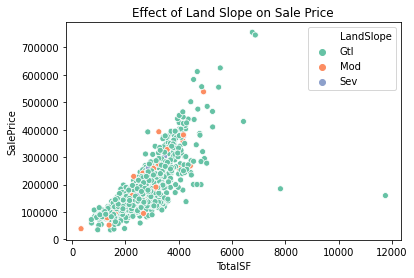

In [ ]:
#Check Land Slope: this feature doesn't show a lot of variation so I will drop it 
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "LandSlope", data = engineered, palette = "Set2")
ax.set (title = "Effect of Land Slope on Sale Price")
plt.show()

UTILITIES

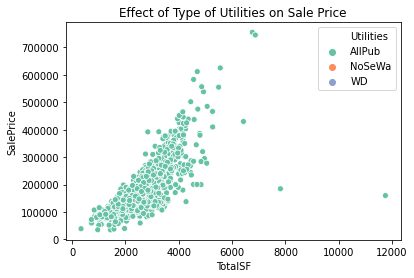

In [ ]:
#Check Utilities: this feature doesn't show a lot of variation so I will drop it 
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "Utilities", data = engineered, palette = "Set2")
ax.set (title = "Effect of Type of Utilities on Sale Price")
plt.show()

FUNCTIONAL

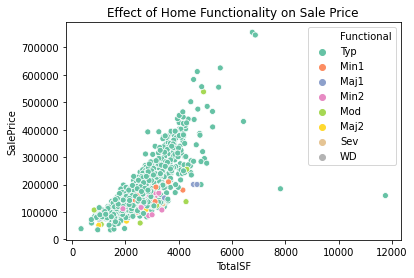

In [ ]:
#this feature doesn't show a lot of variation so I will drop it. 
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "Functional", data = engineered, palette = "Set2")
ax.set (title = "Effect of Home Functionality on Sale Price")
plt.show()

BASEMENT FINISH TYPE

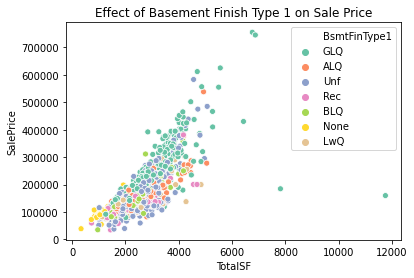

In [ ]:
#Check Basement Finish Type 1: 
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "BsmtFinType1", data = engineered, palette = "Set2")
ax.set (title = "Effect of Basement Finish Type 1 on Sale Price")
plt.show()

In [ ]:
# Encode Basement Finnish Type 1. The encoding is a bit strange because low quality(unfinished) sells at a higher price (perhabs they are new homes)
scale_mapper = {'None': 0,
                'LwQ':1, 
                'Unf': 1,
                'Rec': 2,
                'BLQ' :2,
                'ALQ' : 2,
                'RFn':2,
                'GLQ':3}

# Map feature values to scale
engineered['BsmtFinType'] = cleaned['BsmtFinType1'].replace(scale_mapper)

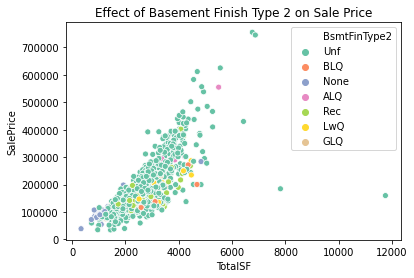

In [ ]:
#Check Basement Finish Type 2: Doesn't show a lot of variation so will be dropped.
ax  = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "BsmtFinType2", data = engineered, palette = "Set2")
ax.set (title = "Effect of Basement Finish Type 2 on Sale Price")
plt.show()

DROPPING REDUNDANT FEATURES

In [ ]:
#Drop the redundant features from the dataframe
to_drop = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','LowQualFinSF','GrLivArea','1stFlrSF',
          'PoolArea','MiscVal','ScreenPorch', 'EnclosedPorch','OpenPorchSF','3SsnPorch',
          'OverallCond','YearBuilt','YearRemodAdd','FullBath','HalfBath','KitchenAbvGr',
           'Fireplaces','MSZoning','MSSubClass','Street', 'Neighborhood', 'Condition1',
           'Condition2','BldgType','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
           'Foundation','Heating','CentralAir','Electrical','GarageType','PavedDrive',
           'SaleType','SaleCondition','MoSold', "ExterCond", "BsmtCond", "BsmtExposure", 
           "GarageCond", "GarageQual", "LotShape", "LandContour", "LandSlope", "Utilities",
           "Functional", "BsmtFinType2", "LotConfig", "HouseStyle", "MasVnrType", "2ndFlrSF", 
           "TotalBsmtSF",'BsmtFinType1', "BsmtHalfBath", "BsmtFullBath","WoodDeckSF"]

#save finished dataframe 
finished = engineered.drop(to_drop,axis=1)

### **3.5 OUTLIERS**

Te author of the original paper suggested to move any houses with Gross living areas bigger than 4000 square feet. These are houses with the following ID's: 524, 692, 1183, 1299 and 2550.  Houses with ID's > 1460 are in the test dataset and cannot easily be removed in a Kaggle competition.


I have assigned houses with a TotalSF bigger or smaller than 3 standarddeviations as outlier. These are houses with the following ID's: 441, 497, 524, 692, 799, 1045, 1170, 1183, 1299, 1354, 1374. I identified the same ID's as the author, plus some addition houses.




In [ ]:
#outliers according to author
BigHouses = cleaned[cleaned["GrLivArea"] > 4000]
BigHouses

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1.0,0.0,3,1,3,1,Ex,11,Typ,1,BuiltIn,Fin,3.0,884.0,TA,TA,Y,208,406,0,0,0,0,0,10,2007,New,Partial,184750.0
691,692,60,RL,104.0,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455.0,Unf,0.0,989.0,2444.0,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0.0,1.0,3,1,4,1,Ex,10,Typ,2,Attchd,Fin,3.0,832.0,TA,TA,Y,382,50,0,0,0,0,0,1,2007,WD,Normal,755000.0
1182,1183,60,RL,160.0,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096.0,Unf,0.0,300.0,2396.0,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1.0,0.0,3,1,4,1,Ex,10,Typ,2,Attchd,Fin,3.0,813.0,TA,TA,Y,171,78,0,0,0,555,0,7,2007,WD,Abnorml,745000.0
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Attchd,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,0,1,2008,New,Partial,160000.0
1089,2550,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Attchd,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,17000,10,2007,New,Partial,NaN


In [ ]:
#split dataset in train and test
finished_train = finished[finished["Id"].isin(train["Id"])]
finished_test =  finished[finished["Id"].isin(test["Id"])]

In [ ]:
# Find the mean and standard dev
std = finished_train["TotalSF"].std()
mean = finished_train["TotalSF"].mean()

# Calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

# Create column outlier
finished_train["outlier"] = finished_train["TotalSF"].apply(lambda x: 1 if x < lower else 1 if x > upper else 0)


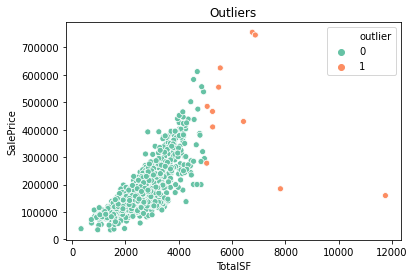

In [ ]:
#Visualize the outliers: the outliers are houses that are extremely big or extremely expensive for their size
ax = sns.scatterplot(x="TotalSF", y = "SalePrice", hue = "outlier" , data = finished_train, palette= "Set2")
ax.set (title = "Outliers")
plt.show()

In [ ]:
# drop outliers and outliers column
finished_train = finished_train[finished_train["outlier"] == 0]
finished_train = finished_train.drop("outlier", axis=1)

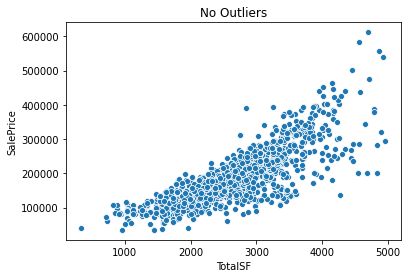

In [ ]:
#Visualize the data without outliers
ax = sns.scatterplot(x="TotalSF", y = "SalePrice" , data = finished_train, palette= "Set2")
ax.set (title = "No Outliers")
plt.show()

In [ ]:
#merge train and test in new dataframe
finished = pd.concat([finished_train, finished_test])


In [ ]:
#save finished dataframe 
#finished.to_csv("finished_data_github.csv")

In [ ]:
finished.head()

,Id,LotFrontage,LotArea,OverallQual,MasVnrArea,ExterQual,BsmtQual,HeatingQC,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageFinish,GarageCars,GarageArea,YrSold,SalePrice,TotalSF,GardenSF,TotalPorchSF,HasGarage,HasBasement,HasPorch,SalePriceLog,LotAreaLog,TotalSFLog,GardenSFLog,AgeSold,NewHouse,YearsRenovated,RecentRenovated,TotalBath,HasFireplace,CulDSac,NH_Blmngtn,NH_Blueste,NH_BrDale,NH_BrkSide,NH_ClearCr,NH_CollgCr,NH_Crawfor,NH_Edwards,NH_Gilbert,NH_IDOTRR,NH_MeadowV,NH_Mitchel,NH_NAmes,NH_NPkVill,NH_NWAmes,NH_NoRidge,NH_NridgHt,NH_OldTown,NH_SWISU,NH_Sawyer,NH_SawyerW,NH_Somerst,NH_StoneBr,NH_Timber,NH_Veenker,NearStreet,NearPark,NearTrain,SingleLevel,HasMasonry,Found_BrkTil,Found_CBlock,Found_PConc,Found_Slab,Found_Stone,Found_Wood,HasCentralAir,Garage_2Types,Garage_Attchd,Garage_Basment,Garage_BuiltIn,Garage_CarPort,Garage_Detchd,Garage_None,AbnormalSale,BsmtFinType
0,1,65.0,8450,7,196.0,3,3,5,3,4,8,2,2.0,548.0,2008,208500.0,2566.0,7594,61,1,1,1,12.247694,9.041922,7.850104,8.935114,5,0,5,0,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,3
1,2,80.0,9600,6,0.0,2,3,5,3,3,6,2,2.0,460.0,2007,181500.0,2524.0,8338,298,1,1,1,12.109011,9.169518,7.833600,9.028579,31,0,31,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,2
2,3,68.0,11250,7,162.0,3,3,5,3,4,6,2,2.0,608.0,2008,223500.0,2706.0,10330,42,1,1,1,12.317167,9.328123,7.903227,9.242808,7,0,6,0,2.5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,3
3,4,60.0,9550,7,0.0,2,2,4,3,4,7,1,3.0,642.0,2006,140000.0,2473.0,8589,307,1,1,1,11.849398,9.164296,7.813187,9.058238,91,0,36,0,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,2
4,5,84.0,14260,8,350.0,3,3,5,4,4,9,2,3.0,836.0,2008,250000.0,3343.0,13115,276,1,1,1,12.429216,9.565214,8.114624,9.481512,8,0,8,0,2.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,3


### **3.6 SCALING**

In [ ]:
# Create a copy of the engineered dataset without outliers
scaled = finished.copy()
scaled_train = scaled[scaled["Id"].isin(train["Id"])]
scaled_test =  scaled[scaled["Id"].isin(test["Id"])]

In [ ]:
# Instantiate StandardScaler
SS_scaler = StandardScaler()

# Fit SS_scaler to the data
SS_scaler.fit(scaled_train[['LotFrontage']])
SS_scaler.fit(scaled_train[['LotArea']])
SS_scaler.fit(scaled_train[['MasVnrArea']])
SS_scaler.fit(scaled_train[['GarageArea']])
SS_scaler.fit(scaled_train[['YrSold']])
SS_scaler.fit(scaled_train[['TotalSF']])
SS_scaler.fit(scaled_train[['TotalPorchSF']])
SS_scaler.fit(scaled_train[['AgeSold']])
SS_scaler.fit(scaled_train[['YearsRenovated']])
SS_scaler.fit(scaled_train[['GardenSF']])


# Transform the train data using the fitted scaler (test data should also be transformed)
scaled_train['LotFrontage_S'] = SS_scaler.transform(scaled_train[['LotFrontage']])
scaled_train['LotArea_S'] = SS_scaler.transform(scaled_train[['LotArea']])
scaled_train['MasVnrArea_S'] = SS_scaler.transform(scaled_train[['MasVnrArea']])
scaled_train['GarageArea_S'] = SS_scaler.transform(scaled_train[['GarageArea']])
scaled_train['YrSold_S'] = SS_scaler.transform(scaled_train[['YrSold']])
scaled_train['TotalSF_S'] = SS_scaler.transform(scaled_train[['TotalSF']])
scaled_train['TotalPorchSF_S'] = SS_scaler.transform(scaled_train[['TotalPorchSF']])
scaled_train['AgeSold_S'] = SS_scaler.transform(scaled_train[['AgeSold']])
scaled_train['YearsRenovated_S'] = SS_scaler.transform(scaled_train[['YearsRenovated']])
scaled_train['GardenSF_S'] = SS_scaler.transform(scaled_train[['GardenSF']])



In [ ]:
# Create a scaled dataset without the unscaled features
scaled_train_drop = scaled_train.drop(["LotArea", "LotFrontage", "MasVnrArea", 'GarageArea', 'YrSold', 'TotalSF', 'TotalPorchSF', 'AgeSold', 'YearsRenovated', 'GardenSF'], axis=1)
scaled_train_drop.head()

,Id,OverallQual,ExterQual,BsmtQual,HeatingQC,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageFinish,GarageCars,SalePrice,HasGarage,HasBasement,HasPorch,SalePriceLog,LotAreaLog,TotalSFLog,GardenSFLog,NewHouse,RecentRenovated,TotalBath,HasFireplace,CulDSac,NH_Blmngtn,NH_Blueste,NH_BrDale,NH_BrkSide,NH_ClearCr,NH_CollgCr,NH_Crawfor,NH_Edwards,NH_Gilbert,NH_IDOTRR,NH_MeadowV,NH_Mitchel,NH_NAmes,NH_NPkVill,NH_NWAmes,NH_NoRidge,NH_NridgHt,NH_OldTown,NH_SWISU,NH_Sawyer,NH_SawyerW,NH_Somerst,NH_StoneBr,NH_Timber,NH_Veenker,NearStreet,NearPark,NearTrain,SingleLevel,HasMasonry,Found_BrkTil,Found_CBlock,Found_PConc,Found_Slab,Found_Stone,Found_Wood,HasCentralAir,Garage_2Types,Garage_Attchd,Garage_Basment,Garage_BuiltIn,Garage_CarPort,Garage_Detchd,Garage_None,AbnormalSale,BsmtFinType,LotFrontage_S,LotArea_S,MasVnrArea_S,GarageArea_S,YrSold_S,TotalSF_S,TotalPorchSF_S,AgeSold_S,YearsRenovated_S,GardenSF_S
0,1,7,3,3,5,3,4,8,2,2.0,208500.0,1,1,1,12.247694,9.041922,7.850104,8.935114,0,0,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,3,-0.941879,-0.087824,-0.928536,-0.892683,-0.743975,-0.687140,-0.942286,-0.947990,-0.947990,-0.175012
1,2,6,2,3,5,3,3,6,2,2.0,181500.0,1,1,1,12.109011,9.169518,7.833600,9.028579,0,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,2,-0.940351,0.029309,-0.948500,-0.901646,-0.744076,-0.691417,-0.918147,-0.945342,-0.945342,-0.099232
2,3,7,3,3,5,3,4,6,2,2.0,223500.0,1,1,1,12.317167,9.328123,7.903227,9.242808,0,0,2.5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,3,-0.941573,0.197370,-0.931999,-0.886572,-0.743975,-0.672880,-0.944222,-0.947787,-0.947888,0.103663
3,4,7,2,2,4,3,4,7,1,3.0,140000.0,1,1,1,11.849398,9.164296,7.813187,9.058238,0,0,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,2,-0.942388,0.024216,-0.948500,-0.883109,-0.744178,-0.696612,-0.917230,-0.939231,-0.944833,-0.073666
4,5,8,3,3,5,4,4,9,2,3.0,250000.0,1,1,1,12.429216,9.565214,8.114624,9.481512,0,0,2.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,3,-0.939944,0.503954,-0.912850,-0.863349,-0.743975,-0.607998,-0.920388,-0.947685,-0.947685,0.387330



I ran a quick regression on the Scaled dataframe and the Finished dataframe (same data, but features are not scaled). The results on the scaled dataframe were quite a bit worse then un the unscaled dataframe. I will therefore continue with the unscaled (finished) dataframe.

# **4 MODELLING**

I tried some Feature Selection before modelling. I used PCA, Recursive Feature and the Feature Selector library. This last tool allows you to eliminate features based on having too many missing data, collinearity, low importance and low variance. It is a pretty nice library, but it is not very compatible with Google Colab. In the end I found the best Kaggle results with the full dataframe of >70 features. In the real world I would certainly accept a slightly lower score for a less complex model, but this is Kaggle.... 




In [ ]:
#split data in train and test
finished_train = finished[finished["Id"].isin(train["Id"])]
finished_test =  finished[finished["Id"].isin(test["Id"])]

### **4.1 TO LOG OR NOT TO LOG**

In [ ]:
#REGRESSION SALE PRICE
X0 = finished_train.drop(["SalePrice","SalePriceLog", "Id"], axis=1)
y0 = finished_train ["SalePrice"]

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X0, y0, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg = LinearRegression()

# Fit the regressor to the training data
reg.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg.score(X_test, y_test)))
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {}".format(RMSE))
MAE = (mean_absolute_error(y_test, y_pred))
print("MAE: {}".format(MAE))


R^2: 0.8588751622947397
RMSE: 30305.88884906121
MAE: 18813.998140713677


In [ ]:
#REGRESSION LOG SALE PRICE
X0 = finished_train .drop(["SalePrice","SalePriceLog", "Id"], axis=1)
y0 = finished_train  ["SalePriceLog"]

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X0, y0, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg = LinearRegression()

# Fit the regressor to the training data
reg.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg.predict(X_test)

# convert y_test en y_pred to non-log to calculate RMSE
y_pred_exp = np.expm1(y_pred)
y_test_exp = np.expm1(y_test)


# Compute and print R^2 and RMSE
print("R^2: {}".format(reg.score(X_test, y_test)))
RMSE = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
print("RMSE: {}".format(RMSE))
MAE = (mean_absolute_error(y_test_exp, y_pred_exp))
print("MAE: {}".format(MAE))
  

R^2: 0.8941045470766599
RMSE: 28723.491100106392
MAE: 16663.389834301877


The Log Transformed Sale Price results in a lower RMSE than the untransformed Sale Price.

### **4.2 KAGGLE SUBMISSION**

I did my intial data cleaning and modelling in seperate notebooks and I can't replicate my exact results. After trying many different models, I found the lowest RMSE with a pretty simple Ridge Regression.

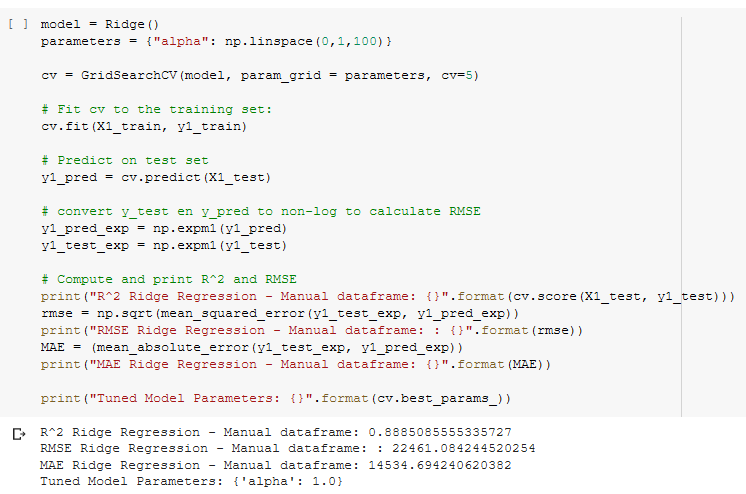

# **5 CONCLUSIONS**

**RMSE**

My RMSE was 22.461 dollar. My cross validation strategy must have been quite poor, because the RMSE on the public leaderboard is only 15.098 dollars. Houses prices ranged from 34.900 to 755.000 dollars (mean: 179.854). My MAE indicates that I was on average approximately 14.000 dollars off. Not bad.

**FUTURE IMPROVEMENTS**

My very first approach was to start with only a few features, and add features along the way. I figured too many features would make the model too complex and prone to overfitting. This turned out not to be the case... It appears that we need quite a few different features to predict the housing price accurately. In the future I will led the model decide what features to keep, and what features add little information.

I will also spent even more time on imputing missing values. For example, imputing Lot Frontage by the mean of the neighborhood would probably give a better representation of Lot Frontage than the overall mean. 

**CONCLUDING REMARK**

Kaggle is a great way to practice your machine learning skills, but it isn't necessarily representative of the real world. In the real world I would never use a model with over 70 features. Where feature selection lowered my score slightly in this model, in the real world this would probably be acceptable. 